# 🌍 NERC Digital Gathering - Environmental Data Hackathon — Soils & Land Cover Notebook

Welcome to the NERC Digital Gathering hackathon!  
This notebook contains the challenge briefs and starter code for you to explore weather, climate, and soil data available through CEDA and other sources. In the hackathon we invite you to use NERC data and to explore the CEDA archive. However, Cranfield hold the national soil map and so if your hack involves soil you can also use that dataset too.

In the hackathon, we are offering a chance to explore and interact with a range of meteorological ands other data in CEDA - NERC's Centre for Environmental Data Analysis. The datasets we are looking at include ECMWF, HAD and MIDAS. These data are in different formats and structures so you can explore these differences as well.

## Key Datasets Available:

• **MIDAS** (Met Office Integrated Data Archive System): 
  - Database of raw weather observations from land and marine surface stations, both in the UK and globally
  - Contains daily, hourly and sub-hourly measurements of various parameters like temperature, rainfall, sunshine, wind, cloud cover, and present weather codes
  - Station based timeseries data in CSV format

• **ECMWF** (European Centre for Medium-Range Weather Forecasts): 
  - Organisation that produces weather forecasts and climate reanalyses
  - Includes estimates of atmospheric parameters like air temperature, pressure, and wind at different altitudes
  - Surface parameters like rainfall, soil moisture content, ocean-wave height, and sea-surface temperature, for the entire globe
  - Also has ocean reanalysis and analysis systems like OCEAN5
  - Regional gridded data in NetCDF format

• **HadUK-Grid**: 
  - Dataset of gridded climate variables for the UK derived from interpolated land surface observations
  - Focuses on climate variables like temperature, rainfall, sunshine, mean sea level pressure, wind speed, relative humidity, vapour pressure, days of snow lying, and days of ground frost
  - Available at daily, monthly, seasonal, and annual timescales
  - Regional gridded data in NetCDF format

• **Soils and Land Cover**: 
  - In addition to the meteorological notebooks, we are also running a fourth notebook that allows some comparison of soil types and land cover in the county of Bedfordshire
  - Our challenge is to undertake some spatial analysis to establish any patterns between the datasets

**This notebook sets some challenges using soils and land cover data for Bedfordshire.**

---

## ⚙️ Getting Started

• **Load libraries**  
  The sorts of libraries you may need include `pandas`, `numpy`, `matplotlib`, `seaborn`, and `geopandas`.  
  (Install with `pip install ...` if missing.)

• **Accessing external data**
  There are two key datasets prepared for this exercise, the national soil map from LandIS (https://www.landis.org.uk) and the EU CORINE Land Cover data for 2018. Both datasets are filtered for the UK county of Bedfordshire and then converted to a 100m CSV grid file using the same points to allow intercomparison of the data. The two datasets are:

  - https://nercdigitalgathering2025.github.io/data/Bedfordshire_NATMAP_Soils_100mGrid.csv
  - https://nercdigitalgathering2025.github.io/data/Bedfordshire_CORINE_Landcover_2018_100mGrid.csv
  Further to this, a 'Look Up Table' is avaiable for the CORINE classes.
  - https://nercdigitalgathering2025.github.io/data/land_cover_classes_LUT.csv (also merged into the datafile above)

  The data can be loaded in as shown in this example:
  ```python
  import pandas as pd
  url = "https://nercdigitalgathering2025.github.io/data/Bedfordshire_CORINE_Landcover_2018_100mGrid.csv"
  df = pd.read_csv(url)
  print(df.head())
  ```

• **Notebook structure**  
  Each challenge is introduced in Markdown with background, tasks, and judging criteria.  
  Under each challenge you'll find starter code cells to help you begin.  

• **Data structure**
  We have prepared two CSV data files for you as outlined above. Each file has its own structure.

***Soil dataset***
|Field name|Meaning|
| -------- | ------- |
|Id | identifier|
|MUSID | Map Unit Id|
|Map_symbol|Soil association as shown on the map|
|Description|Simple description of the soil type|
|Geology | Predominant geology|
|Dominant_soils | Principal soils in the region|
|Associated_soils | Other ancillary soils present|
|Site_characteristics | Any special features of the site|
|Cropping_Landuse | Observed cropping and landuse (historical)|
|Soilscape | Soilscapes classification (see https://www.landis.org.uk/data/nmsoilscapes.cfm)|
|Drainage|Soil drainage characteristics|
|Fertility|Soil fertility|
|Habitats|Typical ecological habitats|
|Drains_to|Where water mostluy drains off to|
|Water_protection|Water protection issues|
|URL_reference|Online reference for further information|
|East_1K,North_1K|Grid references in OSGB|

***CORINE dataset***
|Field name|Meaning|
| -------- | ------- |
|Id | identifier|
|Code_18|Land cover code|
|EU_ID|Land cover code EU|
|Description|General description of the land cover|
|East_1K,North_1K|Grid references in OSGB|

---

## ⚙️ Geographical focus
In this hackathon, we will focus the hacking geographically. You can choose to look at the UK as a whole, or focus in on Bedfordshire where we are located. Geographical coordinates for these areas are as follows:

* UK bounding box (roughly -10°W to 3°E, 49°N to 61°N)
* Bedfordshire bounding box (roughly -0.89°W to 0.23°E, 51.95°N to 52.49°N)

---

## ⚙️ Useful links
Here are a few useful web addressses for CEDA data:
* CEDA Data home: https://data.ceda.ac.uk
* CEDA Help Doc home: https://help.ceda.ac.uk
* MIDAS User Guide: https://zenodo.org/records/7357335
* ECMWF website - https://www.ecmwf.int
* JASMIN Notebooks service help: https://help.jasmin.ac.uk/docs/interactive-computing/jasmin-notebooks-service/

---

# 📝 Challenges


## Challenge 1 — Load and Explore Land Cover Data

### Background
CORINE (Coordination of Information on the Environment) Land Cover data provides detailed information about land use and land cover across Europe. The Bedfordshire dataset contains 100m grid resolution data showing different land cover types such as agricultural areas, forests, urban areas, and water bodies.

### Your Task
Load the CORINE Land Cover dataset and perform initial exploration:
- Load the CSV file from the provided URL
- Examine the data structure, columns, and data types
- Generate basic statistics about land cover distribution
- Create visualisations showing land cover patterns

**Success criteria:** successful data loading, clear understanding of data structure, informative statistics and visualisations.


In [ ]:
# Import required libraries for data processing, analysis, and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualisations
plt.style.use('default')
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
# Define URLs for the datasets
landcover_url = "https://nercdigitalgathering2025.github.io/data/Bedfordshire_CORINE_Landcover_2018_100mGrid.csv"
soils_url = "https://nercdigitalgathering2025.github.io/data/Bedfordshire_NATMAP_Soils_100mGrid.csv"

# Load the CORINE Land Cover dataset
print("Loading CORINE Land Cover data...")
landcover_df = pd.read_csv(landcover_url)

# Display basic information about the dataset
print(f"Dataset shape: {landcover_df.shape}")
print(f"Columns: {list(landcover_df.columns)}")
print("\nFirst few rows:")
landcover_df.head()


Loading CORINE Land Cover data...
Dataset shape: (8752, 6)
Columns: ['Id', 'Code_18', 'EU_ID', 'Description', 'East_1K', 'North_1K']

First few rows:


Id  Code_18       EU_ID                 Description  East_1K  North_1K
0   1      231  EU_1595287                    Pastures   492000    262000
1   2      112  EU_1572649  Discontinuous urban fabric   492000    265000
2   3      112  EU_1572649  Discontinuous urban fabric   492000    265000
3   4      231  EU_1595287                    Pastures   493000    261000
4   5      231  EU_1595287                    Pastures   493000    261000

In [ ]:
# Examine data types and basic statistics
print("Data types:")
print(landcover_df.dtypes)
print("\nBasic statistics:")
print(landcover_df.describe())

# Check for missing values
print("\nMissing values:")
print(landcover_df.isnull().sum())

# Display unique values in categorical columns (if any)
print("\nUnique values in each column:")
for col in landcover_df.columns:
    unique_count = landcover_df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 20:  # Show values if not too many
        # Handle mixed data types by converting to string and removing NaN values
        unique_values = landcover_df[col].dropna().astype(str).unique()
        try:
            # Try to sort, but handle cases where sorting might fail
            sorted_values = sorted(unique_values)
            print(f"  Values: {sorted_values}")
        except TypeError:
            # If sorting fails, just show the unique values without sorting
            print(f"  Values: {list(unique_values)}")


Data types:
Id              int64
Code_18         int64
EU_ID          object
Description    object
East_1K         int64
North_1K        int64
dtype: object

Basic statistics:
                Id      Code_18        East_1K       North_1K
count  8752.000000  8752.000000    8752.000000    8752.000000
mean   4376.500000   207.368144  504898.308958  239722.349177
std    2526.629111    67.587970    8995.647032   13525.486502
min       1.000000   111.000000  488000.000000  212000.000000
25%    2188.750000   142.000000  498000.000000  229000.000000
50%    4376.500000   211.000000  504000.000000  239000.000000
75%    6564.250000   231.000000  512000.000000  250000.000000
max    8752.000000   512.000000  527000.000000  271000.000000

Missing values:
Id             0
Code_18        0
EU_ID          0
Description    0
East_1K        0
North_1K       0
dtype: int64

Unique values in each column:
Id: 8752 unique values
Code_18: 20 unique values
  Values: ['111', '112', '121', '122', '124', '131', 

## Challenge 2 — Load and Explore Soils Data

### Background
The NATMAP Soils dataset provides detailed soil information for Bedfordshire at 100m grid resolution. This dataset contains various soil properties including soil type, texture, drainage characteristics, and other physical and chemical properties that are crucial for understanding agricultural potential, flood risk, and environmental processes.

### Your Task
Load the NATMAP Soils dataset and perform comprehensive analysis:
- Load the CSV file from the provided URL
- Examine the data structure and identify different soil properties
- Generate statistics for numerical soil properties
- Analyse categorical soil classifications
- Create visualisations of soil distribution patterns

**Success criteria:** successful data loading, thorough understanding of soil data structure, comprehensive statistical analysis, clear visualisations.


In [ ]:
# Load the NATMAP Soils dataset
print("Loading NATMAP Soils data...")
soils_df = pd.read_csv(soils_url)

# Display basic information about the dataset
print(f"Dataset shape: {soils_df.shape}")
print(f"Columns: {list(soils_df.columns)}")
print("\nFirst few rows:")
soils_df.head()


Loading NATMAP Soils data...
Dataset shape: (9150, 18)
Columns: ['Id', 'MUSID', 'Map_symbol', 'Description', 'Geology', 'Dominant_soils', 'Associated_soils', 'Site_characteristics', 'Cropping_Landuse', 'Soilscape', 'Drainage', 'Fertility', 'Habitats', 'Drains_to', 'Water_protection', 'URL_reference', 'East_1K', 'North_1K']

First few rows:


Id  MUSID  Map_symbol         Description Geology      Dominant_soils  \
0   1      6  Lap_symbol  lake or water body     NaN  Lake or water body   
1   2      6  Lap_symbol  lake or water body     NaN  Lake or water body   
2   3      6  Lap_symbol  lake or water body     NaN  Lake or water body   
3   4      6  Lap_symbol  lake or water body     NaN  Lake or water body   
4   5      6  Lap_symbol  lake or water body     NaN  Lake or water body   

  Associated_soils Site_characteristics Cropping_Landuse Soilscape Drainage  \
0              NaN                  NaN              NaN     water      NaN   
1              NaN                  NaN              NaN     water      NaN   
2              NaN                  NaN              NaN     water      NaN   
3              NaN                  NaN              NaN     water      NaN   
4              NaN                  NaN              NaN     water      NaN   

  Fertility Habitats Drains_to Water_protection  \
0       NaN      NaN       NaN              NaN   
1       NaN      NaN       NaN              NaN   
2       NaN      NaN       NaN              NaN   
3       NaN      NaN       NaN              NaN   
4       NaN      NaN       NaN              NaN   

                                                   URL_reference  East_1K  \
0  http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=6   515000   
1  http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=6   515000   
2  http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=6   516000   
3  http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=6   516000   
4  http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=6   516000   

   North_1K  
0    256000  
1    256000  
2    256000  
3    256000  
4    256000

In [ ]:
# Examine data types and basic statistics
print("Data types:")
print(soils_df.dtypes)
print("\nBasic statistics for numerical columns:")
print(soils_df.describe())

# Check for missing values
print("\nMissing values:")
print(soils_df.isnull().sum())

# Identify numerical vs categorical columns
numerical_cols = soils_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = soils_df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Display unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    unique_count = soils_df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 15:  # Show values if not too many
        # Handle mixed data types by converting to string and removing NaN values
        unique_values = soils_df[col].dropna().astype(str).unique()
        try:
            # Try to sort, but handle cases where sorting might fail
            sorted_values = sorted(unique_values)
            print(f"  Values: {sorted_values}")
        except TypeError:
            # If sorting fails, just show the unique values without sorting
            print(f"  Values: {list(unique_values)}")


Data types:
Id                       int64
MUSID                    int64
Map_symbol              object
Description             object
Geology                 object
Dominant_soils          object
Associated_soils        object
Site_characteristics    object
Cropping_Landuse        object
Soilscape               object
Drainage                object
Fertility               object
Habitats                object
Drains_to               object
Water_protection        object
URL_reference           object
East_1K                  int64
North_1K                 int64
dtype: object

Basic statistics for numerical columns:
                Id         MUSID        East_1K       North_1K
count  9150.000000   9150.000000    9150.000000    9150.000000
mean   4575.500000  48638.146776  505401.311475  240396.393443
std    2641.521815  18215.351244    9444.931511   13284.066414
min       1.000000      6.000000  488000.000000  212000.000000
25%    2288.250000  41103.000000  498000.000000  230000.0000

## Challenge 3 — Statistical Analysis and Visualisation

### Background
Understanding the distribution and patterns in both land cover and soils data is essential for environmental analysis. Statistical analysis helps identify dominant land cover types, soil characteristics, and spatial patterns that can inform land management decisions.

### Your Task
Perform comprehensive statistical analysis and create informative visualisations:
- Generate frequency distributions for land cover types
- Analyse soil property distributions and correlations
- Create spatial visualisations of both datasets
- Identify patterns and anomalies in the data
- Compare the spatial extent and coverage of both datasets

**Success criteria:** comprehensive statistical analysis, clear and informative visualisations, identification of key patterns and relationships.


=== LAND COVER ANALYSIS ===
Potential land cover columns: ['Description']

Analysing column: Description

Land cover type frequencies:
Description
Non-irrigated arable land                                                                3116
Pastures                                                                                 2204
Discontinuous urban fabric                                                               1261
Sport and leisure facilities                                                              508
Coniferous forest                                                                         336
Broad-leaved forest                                                                       325
Industrial or commercial units                                                            293
Mixed forest                                                                              180
Water bodies                                                                              125
Land pr

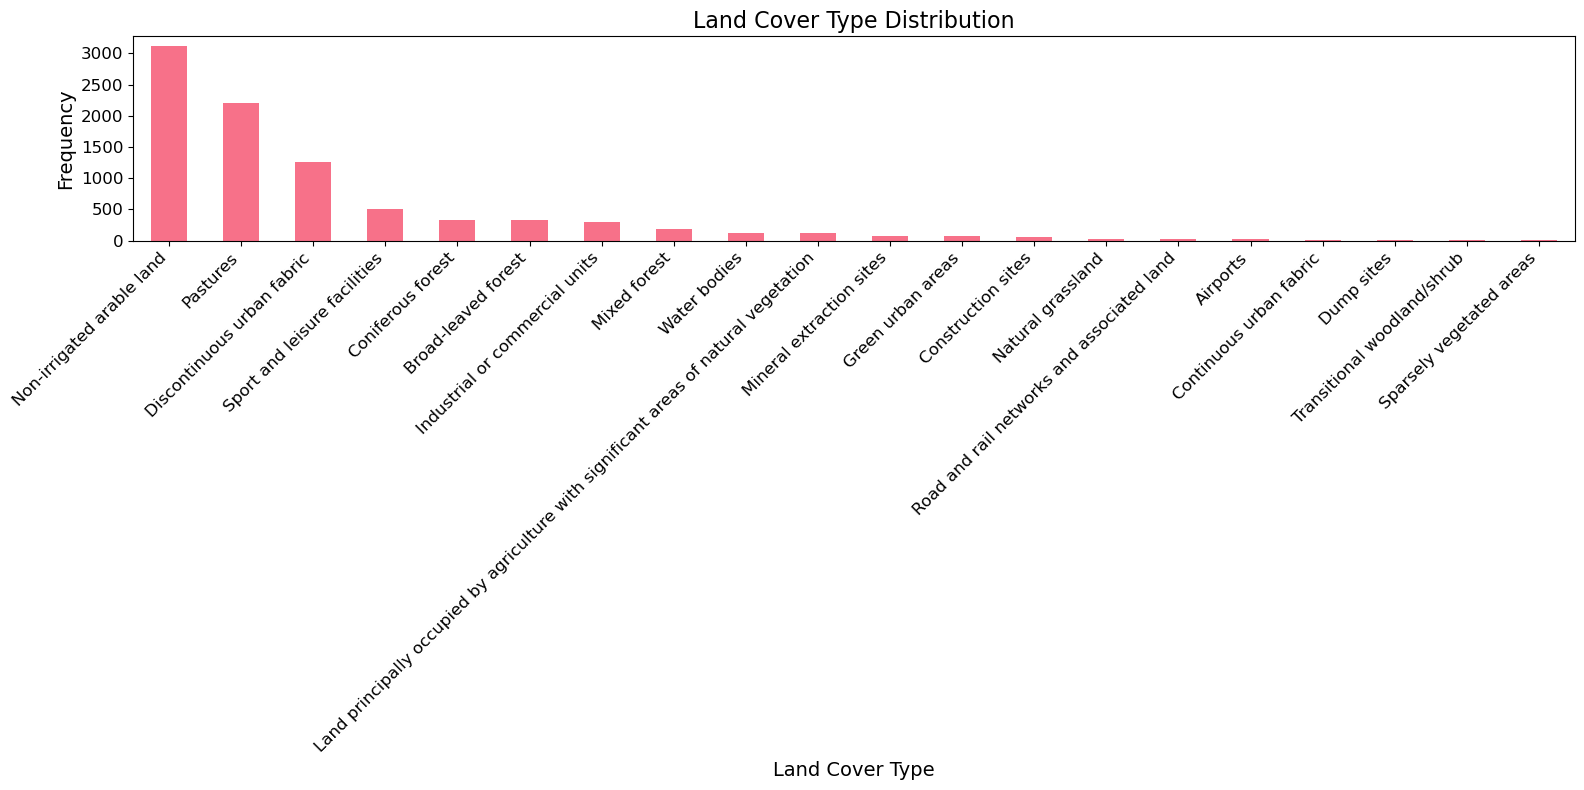

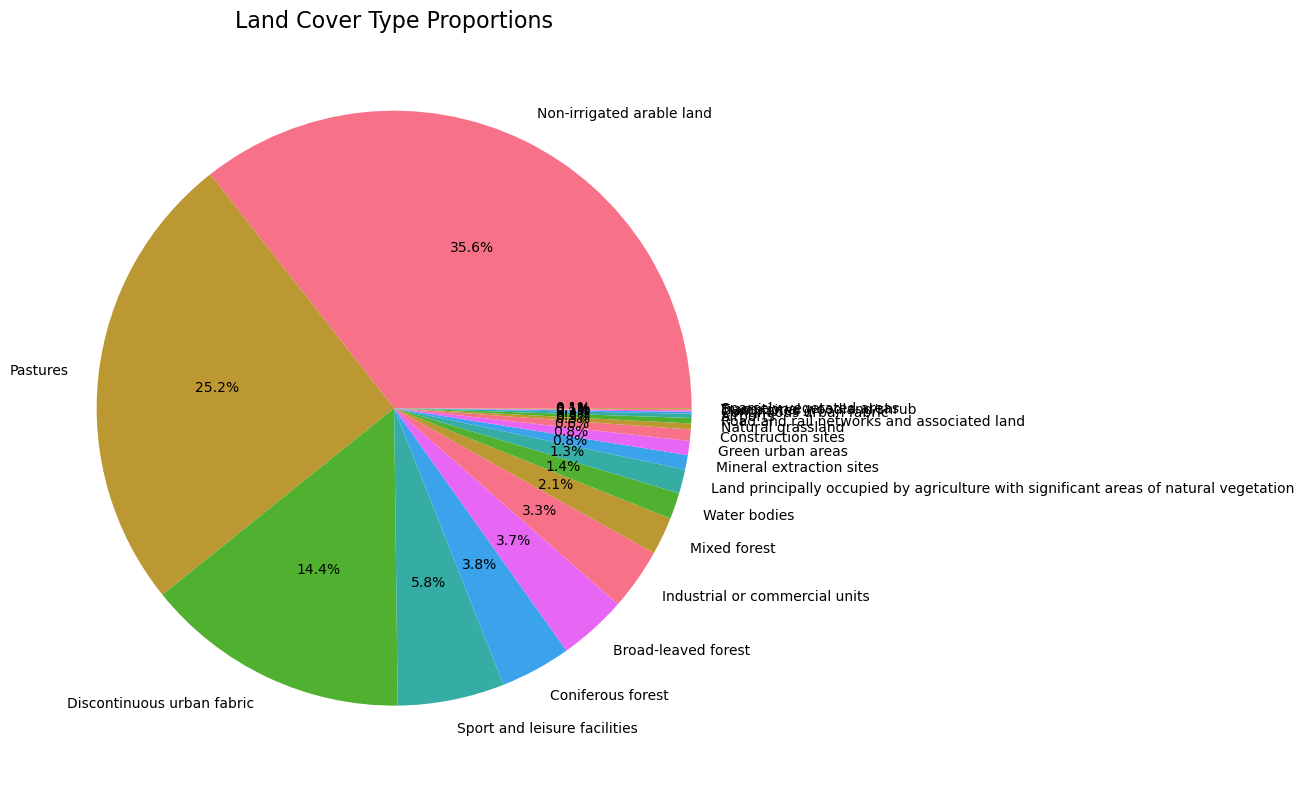

In [ ]:
# Analyse land cover distribution
print("=== LAND COVER ANALYSIS ===")

# Identify the main land cover column (assuming it's one of the columns)
# This will need to be adjusted based on actual column names
landcover_cols = [col for col in landcover_df.columns if col == 'Description']
print(f"Potential land cover columns: {landcover_cols}")

# If we can identify a land cover type column, analyse it
if landcover_cols:
    main_col = landcover_cols[0]
    print(f"\nAnalysing column: {main_col}")
    
    # Frequency analysis
    landcover_counts = landcover_df[main_col].value_counts()
    print("\nLand cover type frequencies:")
    print(landcover_counts)
    
    # Create visualisation - Bar plot of land cover types
    plt.figure(figsize=(16, 8))
    landcover_counts.plot(kind='bar')
    plt.title('Land Cover Type Distribution', fontsize=16)
    plt.xlabel('Land Cover Type', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Pie chart of land cover types
    plt.figure(figsize=(12, 8))
    landcover_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Land Cover Type Proportions', fontsize=16)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("Could not identify land cover column. Please examine the data structure above.")


=== SOILS ANALYSIS ===

Analysing 14 categorical soil properties:

=== MAP_SYMBOL ANALYSIS ===
Total unique values: 8
Top 10 most common values:
Map_symbol
5ap_symbol    3490
4ap_symbol    2639
8ap_symbol     697
Uap_symbol     684
Lap_symbol     619
3ap_symbol     554
7ap_symbol     444
9ap_symbol      23
Name: count, dtype: int64


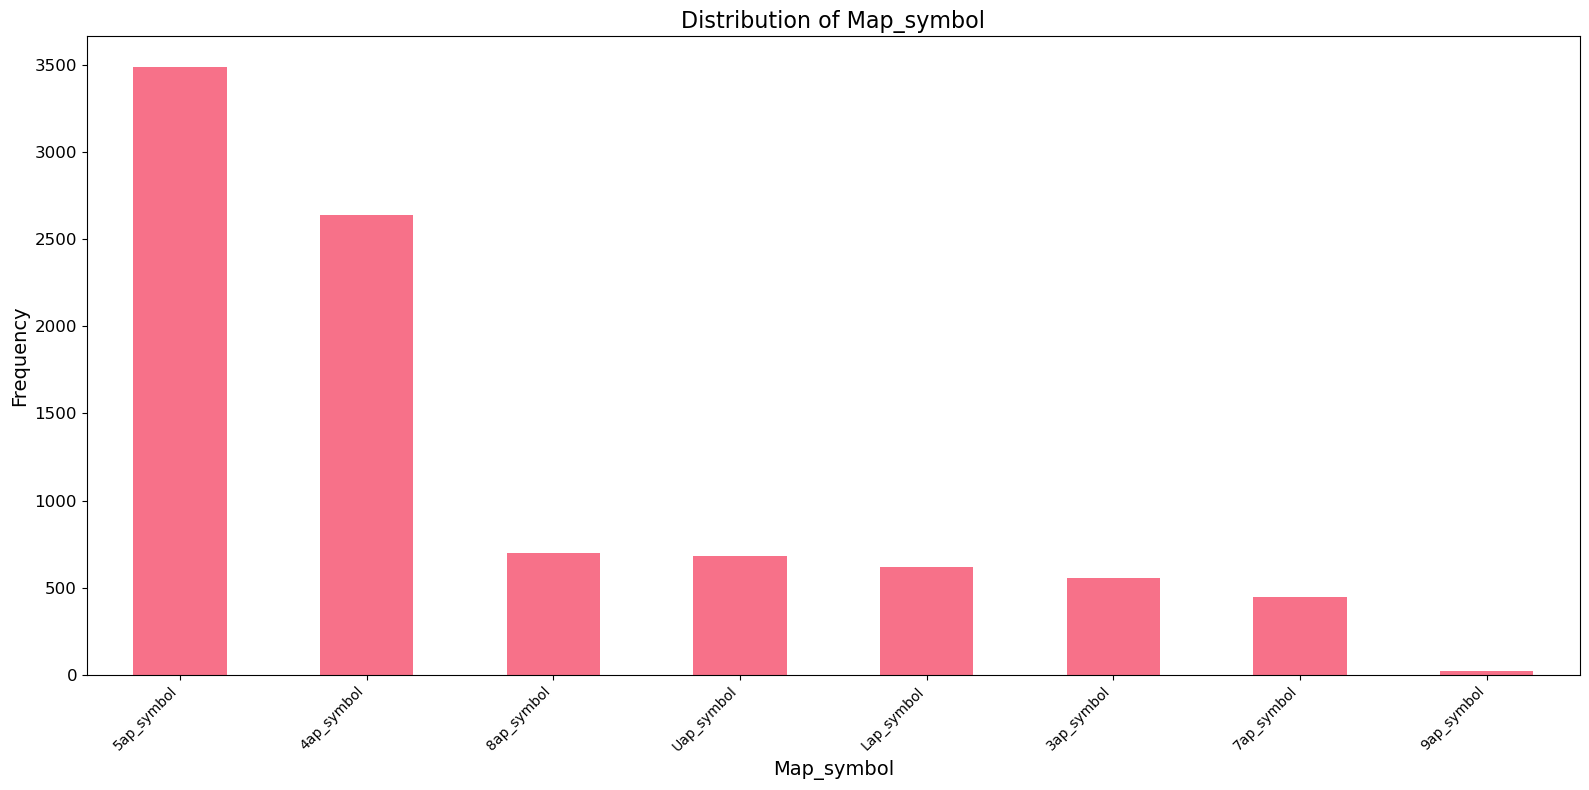


Percentage distribution (top 10):
5ap_symbol: 38.14%
4ap_symbol: 28.84%
8ap_symbol: 7.62%
Uap_symbol: 7.48%
Lap_symbol: 6.77%
3ap_symbol: 6.05%
7ap_symbol: 4.85%
9ap_symbol: 0.25%

=== DESCRIPTION ANALYSIS ===
Total unique values: 17
Top 10 most common values:
Description
deep clay                   2851
seasonally wet deep clay    1106
deep loam to clay            939
deep loam over gravel        906
lake or water body           619
shallow silty over chalk     608
loam over red sandstone      407
clayey over limestone        407
loam over chalk              399
deep sandy                   341
Name: count, dtype: int64


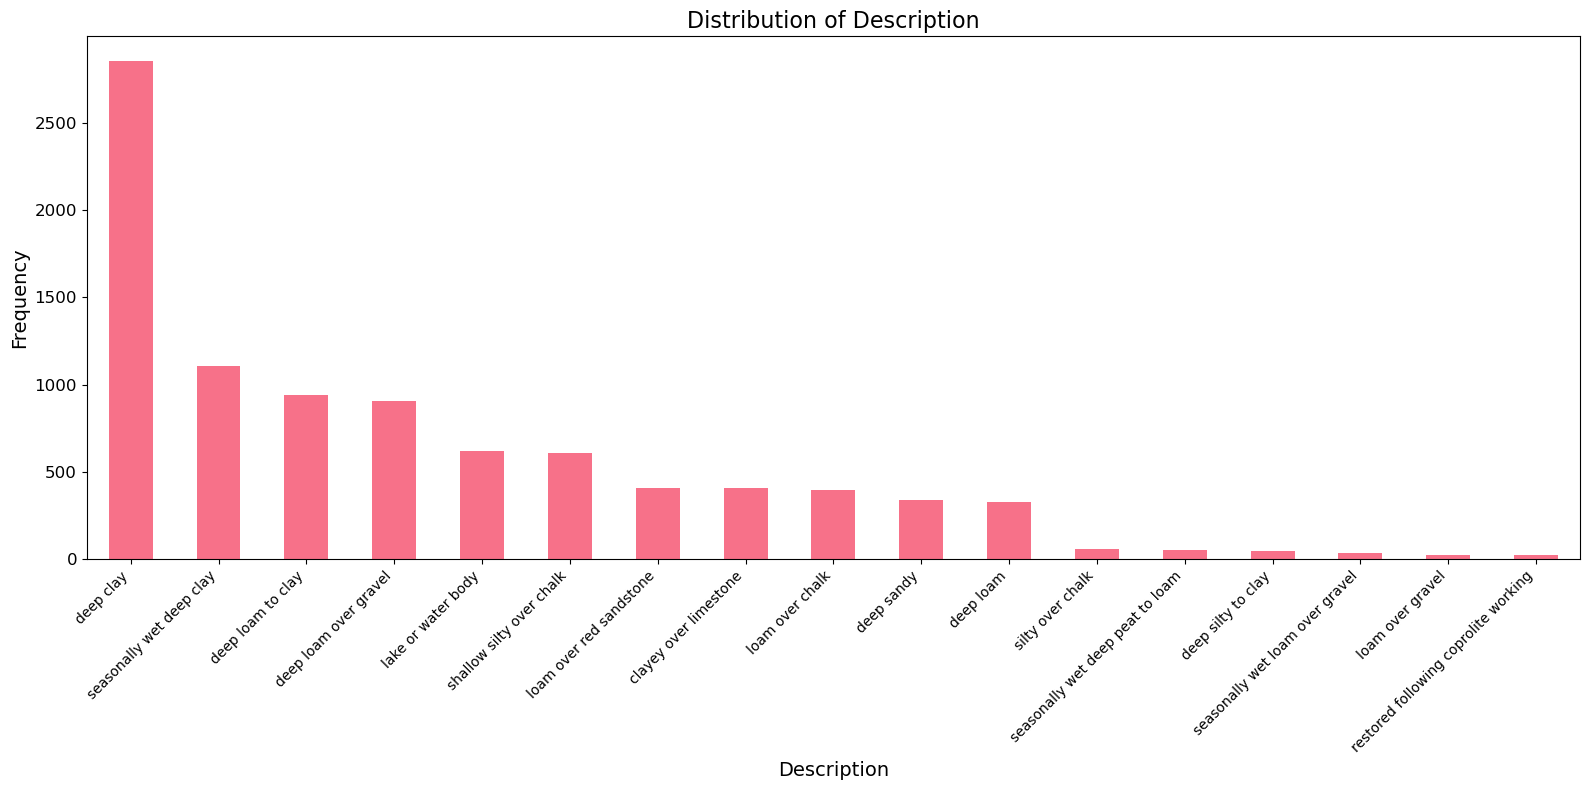


Percentage distribution (top 10):
deep clay: 31.16%
seasonally wet deep clay: 12.09%
deep loam to clay: 10.26%
deep loam over gravel: 9.9%
lake or water body: 6.77%
shallow silty over chalk: 6.64%
loam over red sandstone: 4.45%
clayey over limestone: 4.45%
loam over chalk: 4.36%
deep sandy: 3.73%

=== GEOLOGY ANALYSIS ===
Total unique values: 21
Top 10 most common values:
Geology
Chalky till                        2259
Jurassic and Cretaceous            1347
Marine and river terrace gravel     691
River alluvium                      647
Chalk                               608
Chalky drift and chalk              417
Cretaceous sand and sandstone       407
Jurassic clay and limestone         407
Jurassic and Cretaceous clay        367
Mesozoic and Tertiary sands         341
Name: count, dtype: int64


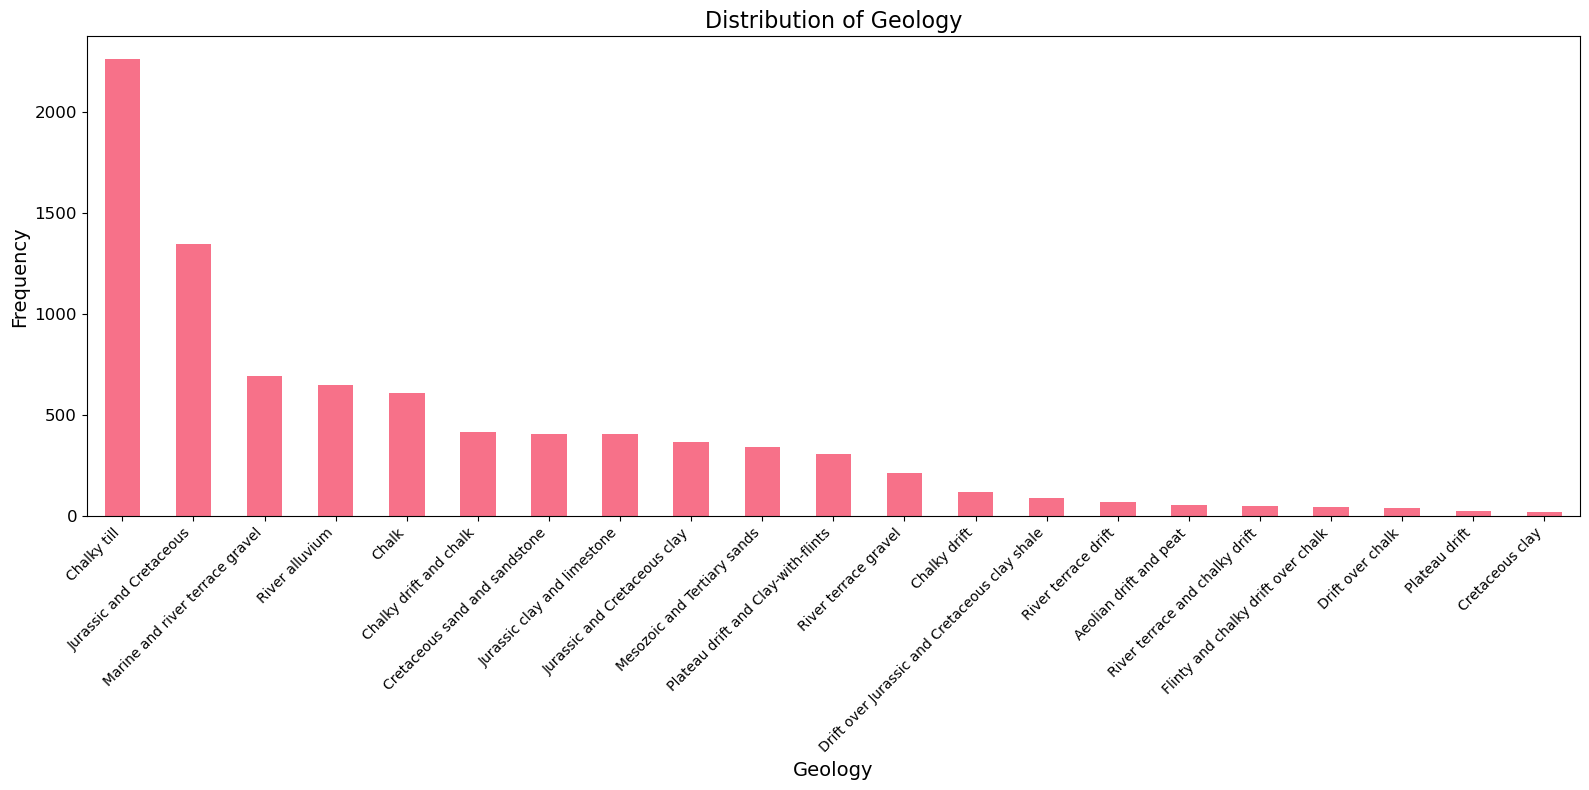


Percentage distribution (top 10):
Chalky till: 24.69%
Jurassic and Cretaceous: 14.72%
Marine and river terrace gravel: 7.55%
River alluvium: 7.07%
Chalk: 6.64%
Chalky drift and chalk: 4.56%
Cretaceous sand and sandstone: 4.45%
Jurassic clay and limestone: 4.45%
Jurassic and Cretaceous clay: 4.01%
Mesozoic and Tertiary sands: 3.73%

Note: Geology has 21 unique values. Showing top 10 only.
Other 11 values represent 11.4% of data

=== DOMINANT_SOILS ANALYSIS ===
Total unique values: 33
Top 10 most common values:
Dominant_soils
Slowly permeable calcareous clayey soils.                                                                                                 1504
Slowly permeable calcareous clayey, and fine loamy over clayey soils.                                                                     1347
Well drained fine loamy soils often over gravel associated with                                                                            691
Lake or water body                      

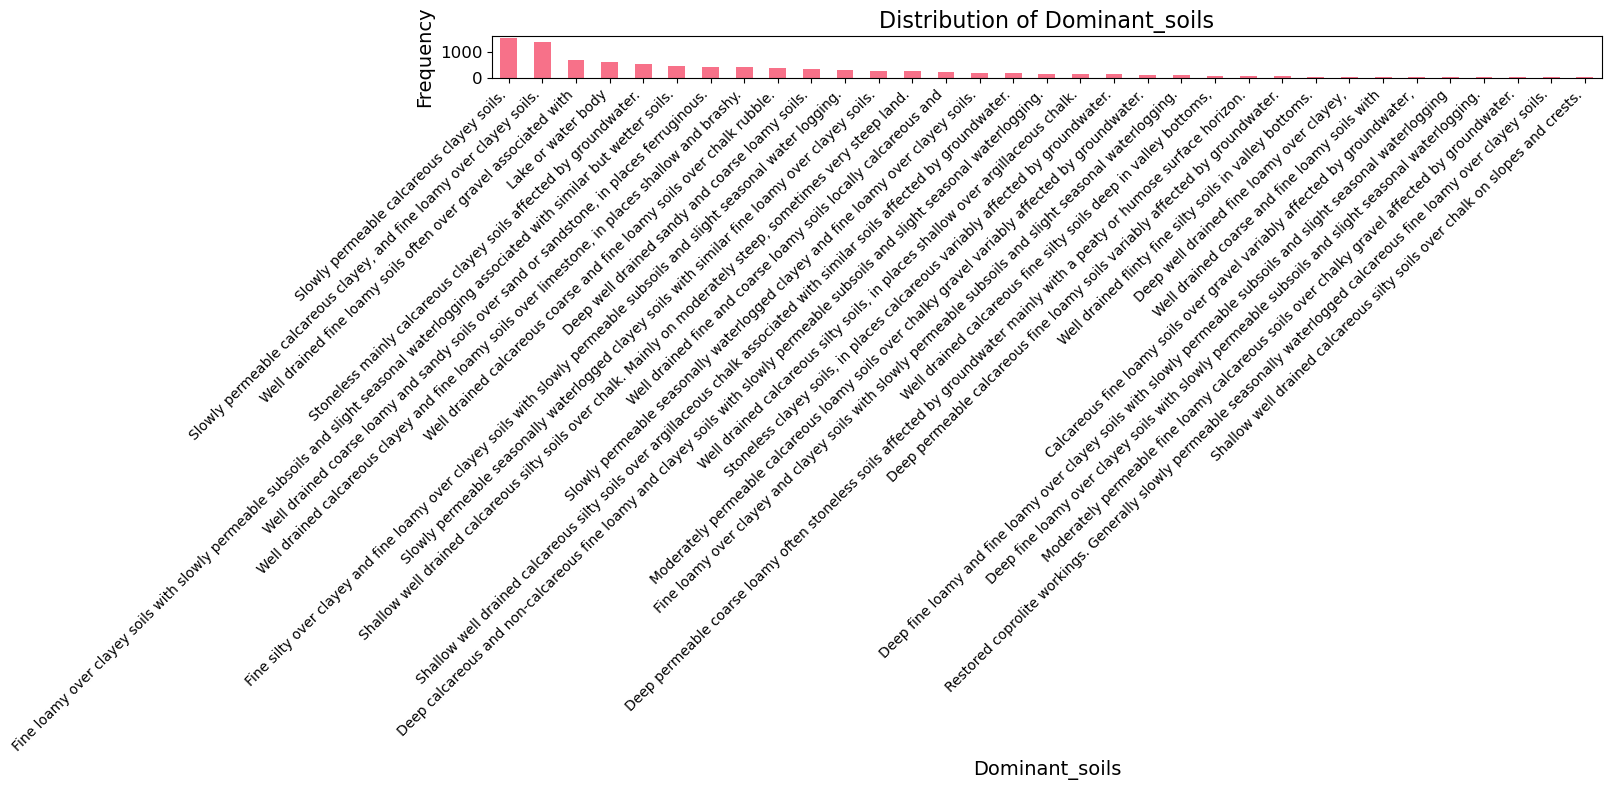


Percentage distribution (top 10):
Slowly permeable calcareous clayey soils.: 16.44%
Slowly permeable calcareous clayey, and fine loamy over clayey soils.: 14.72%
Well drained fine loamy soils often over gravel associated with: 7.55%
Lake or water body: 6.77%
Stoneless mainly calcareous clayey soils affected by groundwater.: 5.6%
Fine loamy over clayey soils with slowly permeable subsoils and slight seasonal waterlogging associated with similar but wetter soils.: 5.13%
Well drained coarse loamy and sandy soils over sand or sandstone, in places ferruginous.: 4.45%
Well drained calcareous clayey and fine loamy soils over limestone, in places shallow and brashy.: 4.45%
Well drained calcareous coarse and fine loamy soils over chalk rubble.: 3.95%
Deep well drained sandy and coarse loamy soils.: 3.73%

Note: Dominant_soils has 33 unique values. Showing top 10 only.
Other 23 values represent 27.2% of data

=== ASSOCIATED_SOILS ANALYSIS ===
Total unique values: 29
Top 10 most common values:
A

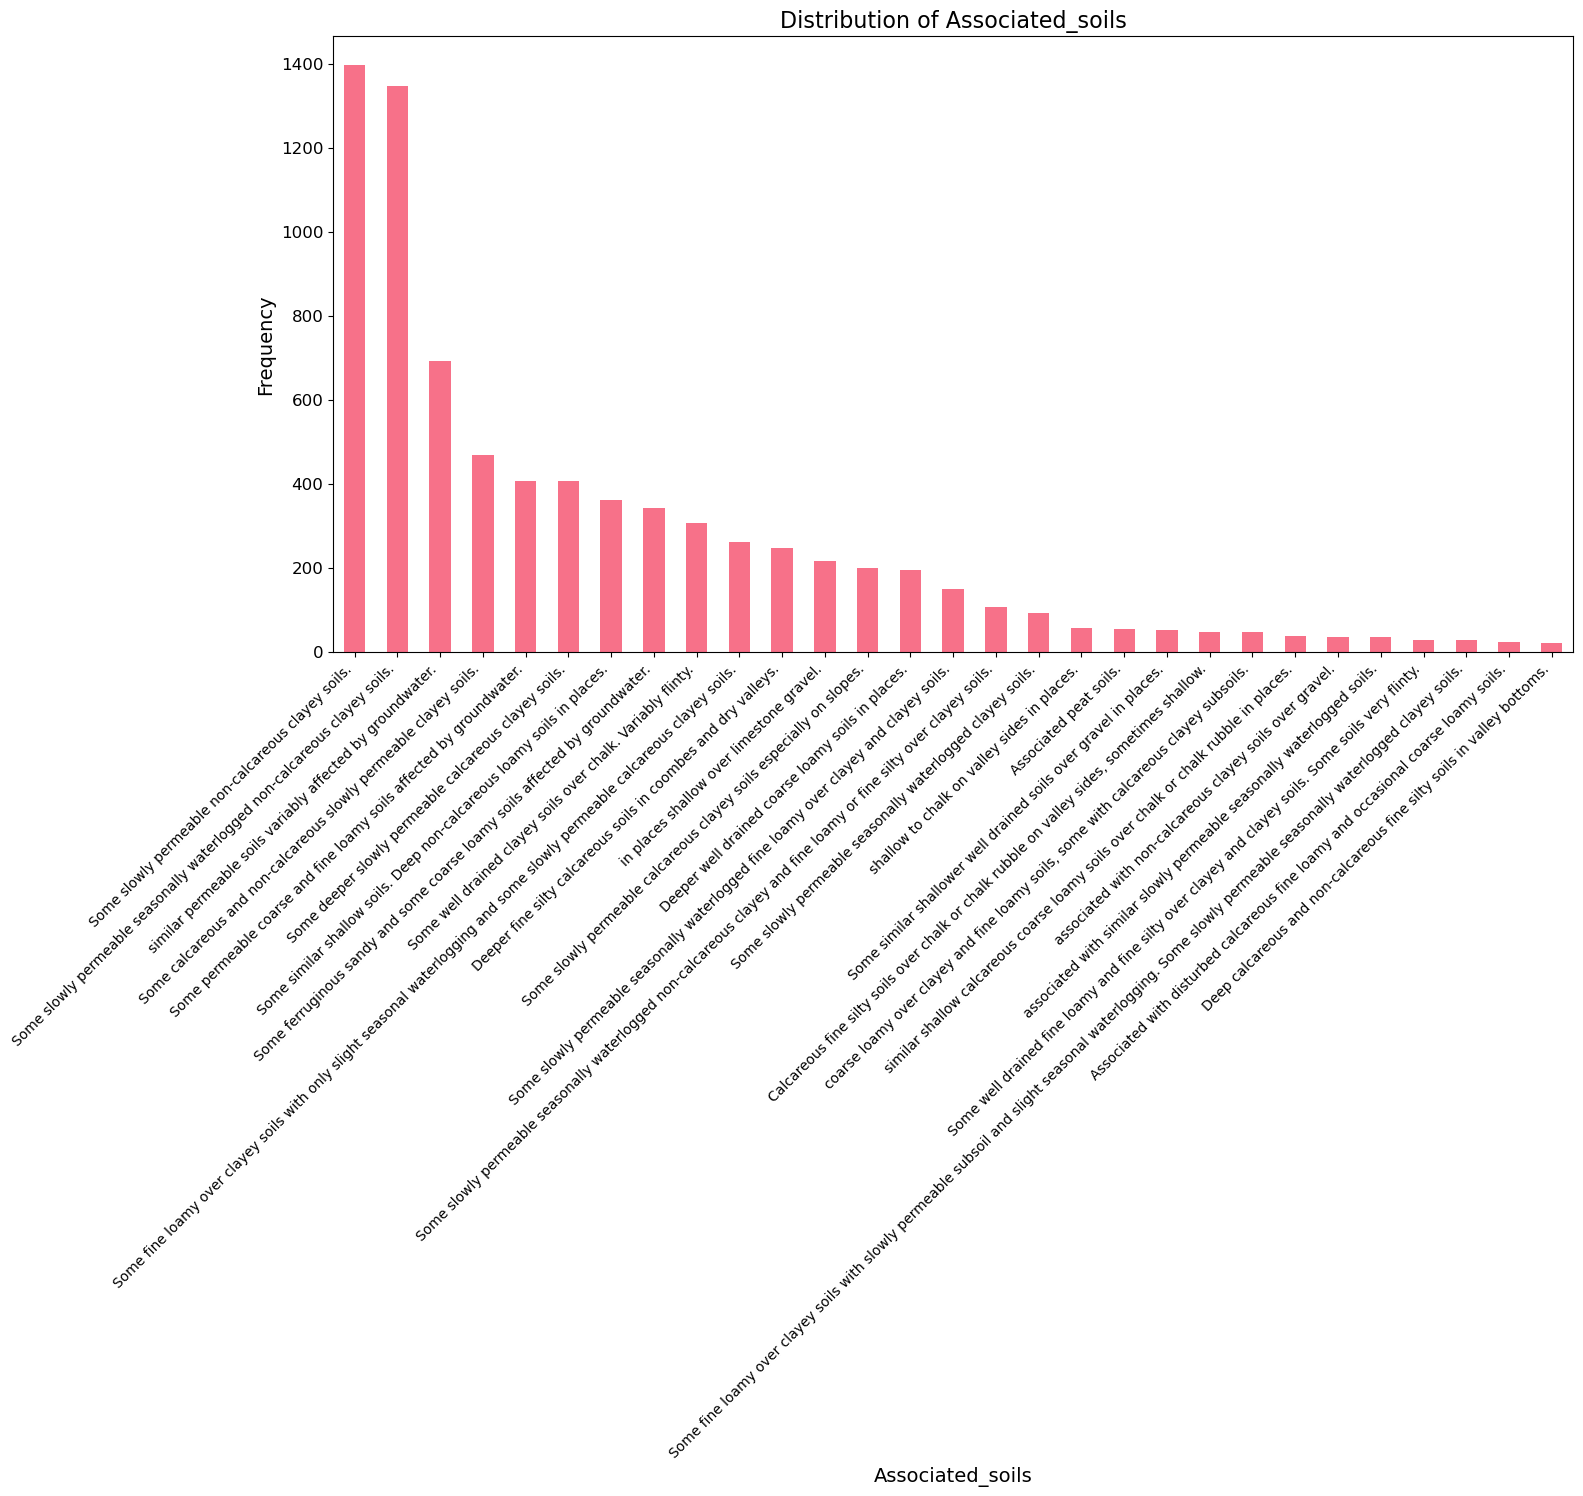


Percentage distribution (top 10):
Some slowly permeable non-calcareous clayey soils.: 15.27%
Some slowly permeable seasonally waterlogged non-calcareous clayey soils.: 14.72%
similar permeable soils variably affected by groundwater.: 7.55%
Some calcareous and non-calcareous slowly permeable clayey soils.: 5.13%
Some permeable coarse and fine loamy soils affected by groundwater.: 4.45%
Some deeper slowly permeable calcareous clayey soils.: 4.45%
Some similar shallow soils. Deep non-calcareous loamy soils in places.: 3.95%
Some ferruginous sandy and some coarse loamy soils affected by groundwater.: 3.73%
Some well drained clayey soils over chalk. Variably flinty.: 3.33%
Some fine loamy over clayey soils with only slight seasonal waterlogging and some slowly permeable calcareous clayey soils.: 2.84%

Note: Associated_soils has 29 unique values. Showing top 10 only.
Other 19 values represent 18.1% of data

=== SITE_CHARACTERISTICS ANALYSIS ===
Total unique values: 10
Top 10 most common va

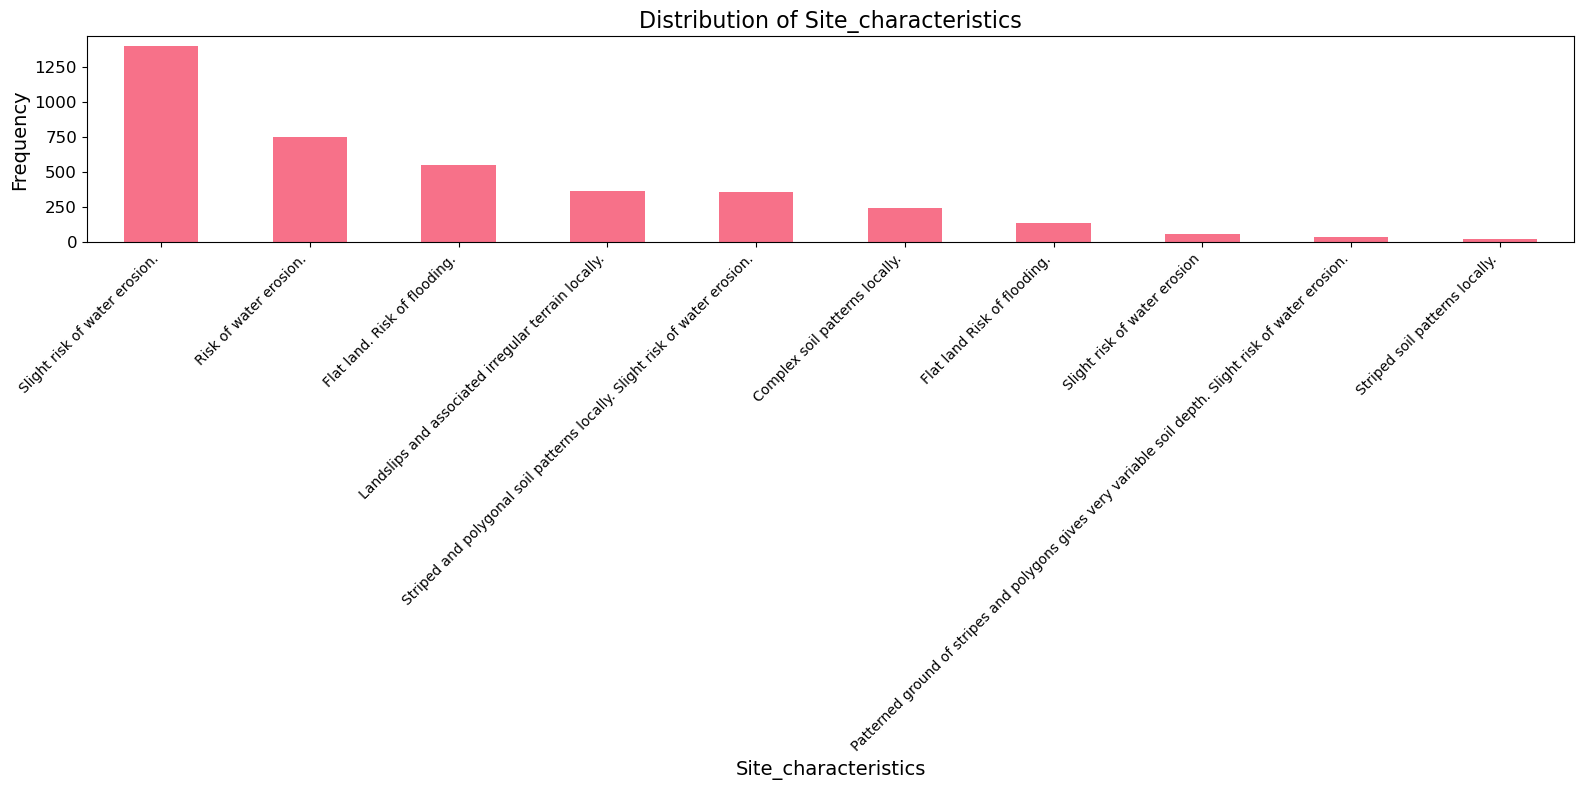


Percentage distribution (top 10):
Slight risk of water erosion.: 15.27%
Risk of water erosion.: 8.17%
Flat land. Risk of flooding.: 5.98%
Landslips and associated irregular terrain locally.: 4.01%
Striped and polygonal soil patterns locally. Slight risk of water erosion.: 3.95%
Complex soil patterns locally.: 2.67%
Flat land Risk of flooding.: 1.48%
Slight risk of water erosion: 0.61%
Patterned ground of stripes and polygons gives very variable soil depth. Slight risk of water erosion.: 0.42%
Striped soil patterns locally.: 0.23%

=== CROPPING_LANDUSE ANALYSIS ===
Total unique values: 33
Top 10 most common values:
Cropping_Landuse
Winter cereals with some other arable crops: some grassland.                                                               1397
Winter cereals in dry lowlands: grassland with some cereals in moist lowlands.                                             1347
Cereal and grassland rotations; some horticultural and glasshouse crops; deciduous woodland in Hampshire

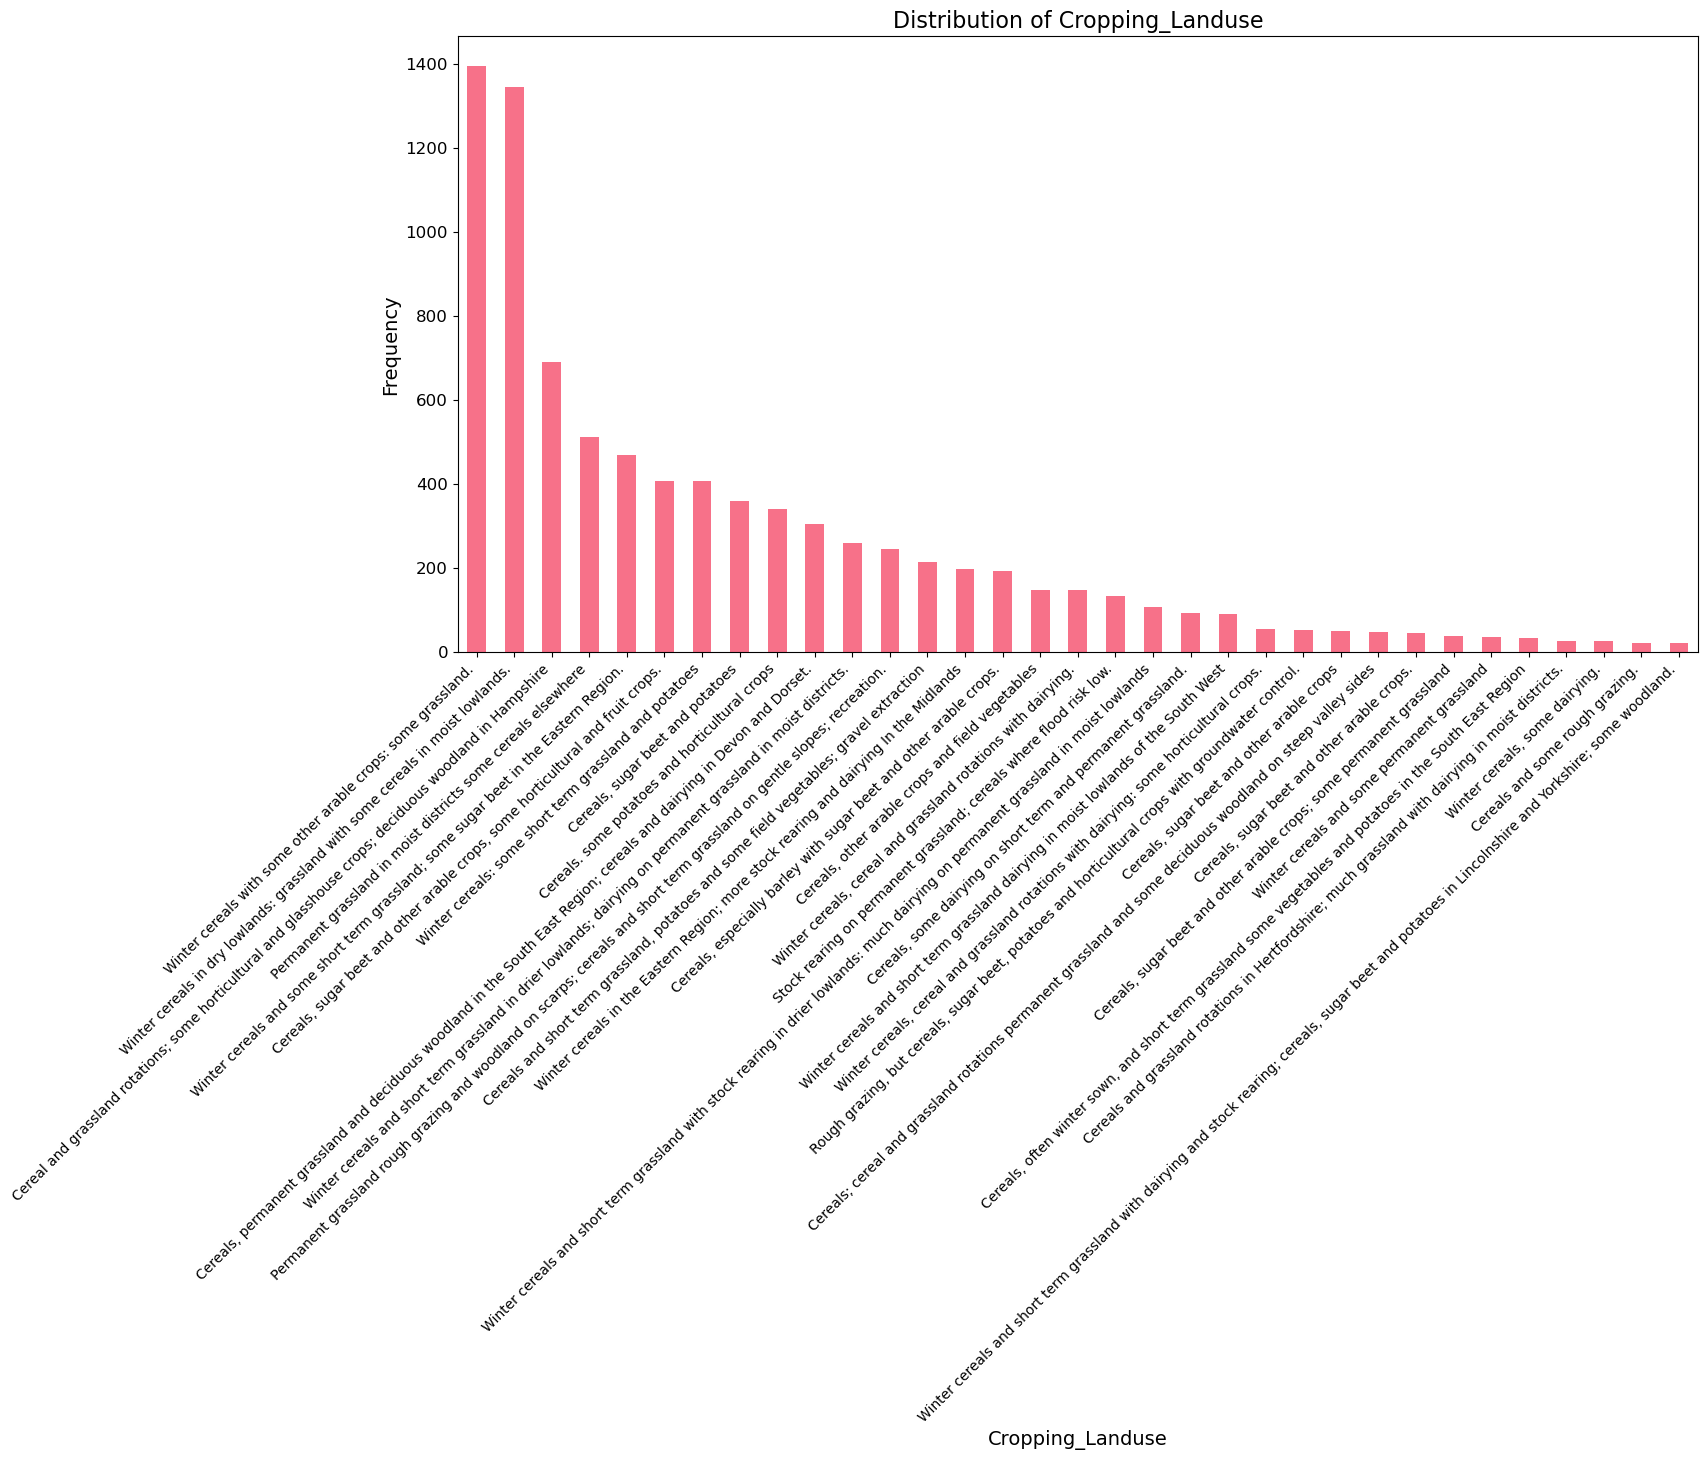


Percentage distribution (top 10):
Winter cereals with some other arable crops: some grassland.: 15.27%
Winter cereals in dry lowlands: grassland with some cereals in moist lowlands.: 14.72%
Cereal and grassland rotations; some horticultural and glasshouse crops; deciduous woodland in Hampshire: 7.55%
Permanent grassland in moist districts some cereals elsewhere: 5.6%
Winter cereals and some short term grassland; some sugar beet in the Eastern Region.: 5.13%
Cereals, sugar beet and other arable crops, some horticultural and fruit crops.: 4.45%
Winter cereals: some short term grassland and potatoes: 4.45%
Cereals, sugar beet and potatoes: 3.95%
Cereals. some potatoes and horticultural crops: 3.73%
Cereals, permanent grassland and deciduous woodland in the South East Region; cereals and dairying in Devon and Dorset.: 3.33%

Note: Cropping_Landuse has 33 unique values. Showing top 10 only.
Other 23 values represent 25.1% of data

=== SOILSCAPE ANALYSIS ===
Total unique values: 13
Top 10 m

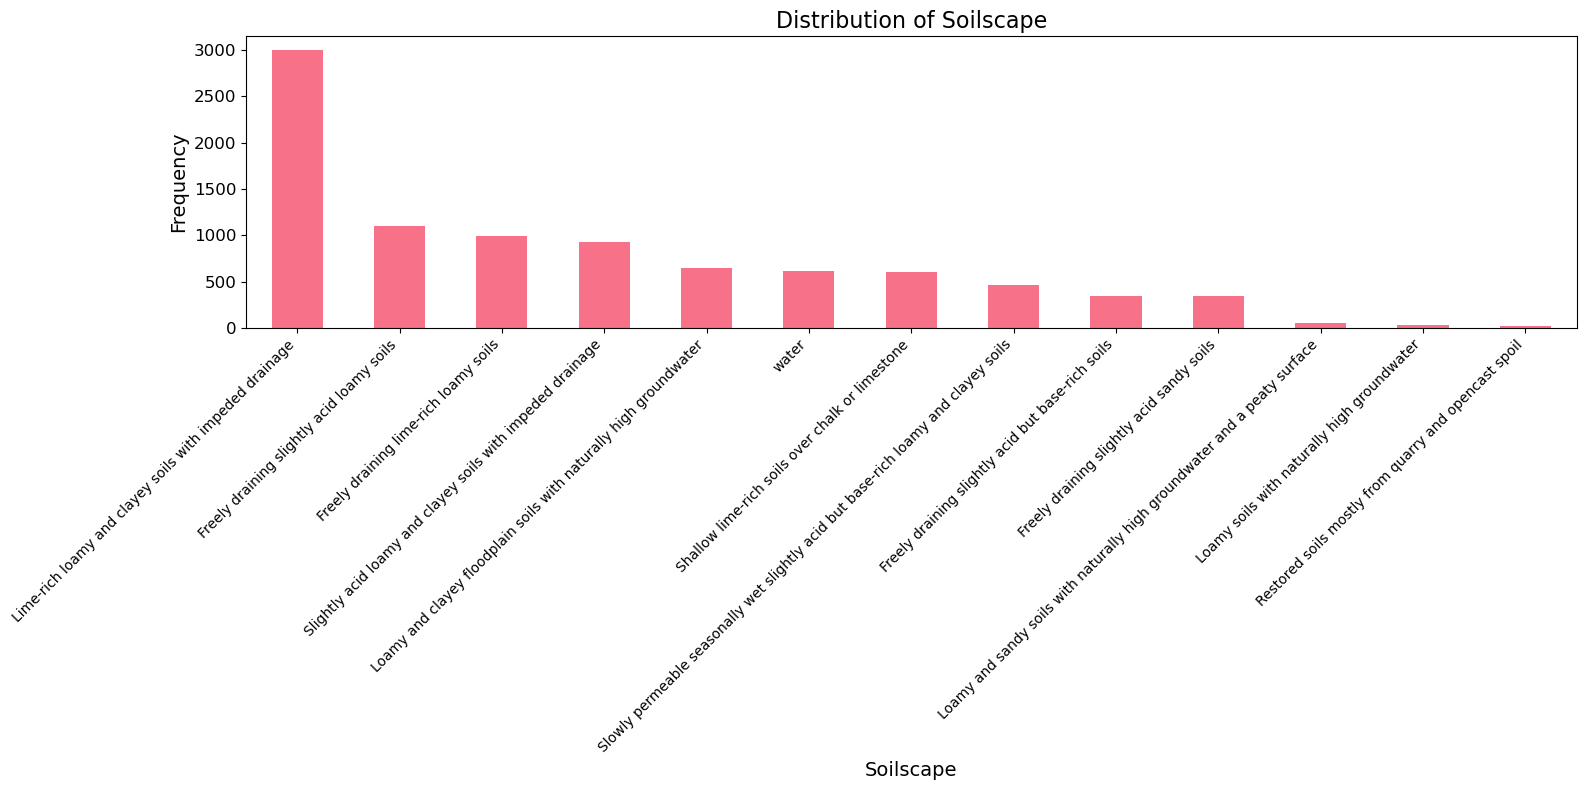


Percentage distribution (top 10):
Lime-rich loamy and clayey soils with impeded drainage: 32.78%
Freely draining slightly acid loamy soils: 12.0%
Freely draining lime-rich loamy soils: 10.87%
Slightly acid loamy and clayey soils with impeded drainage: 10.13%
Loamy and clayey floodplain soils with naturally high groundwater: 7.07%
water: 6.77%
Shallow lime-rich soils over chalk or limestone: 6.64%
Slowly permeable seasonally wet slightly acid but base-rich loamy and clayey soils: 5.02%
Freely draining slightly acid but base-rich soils: 3.78%
Freely draining slightly acid sandy soils: 3.73%

=== DRAINAGE ANALYSIS ===
Total unique values: 5
Top 10 most common values:
Drainage
Slightly impeded drainage    3926
Freely draining              3388
Naturally wet                 735
Impeded drainage              459
Variable                       23
Name: count, dtype: int64


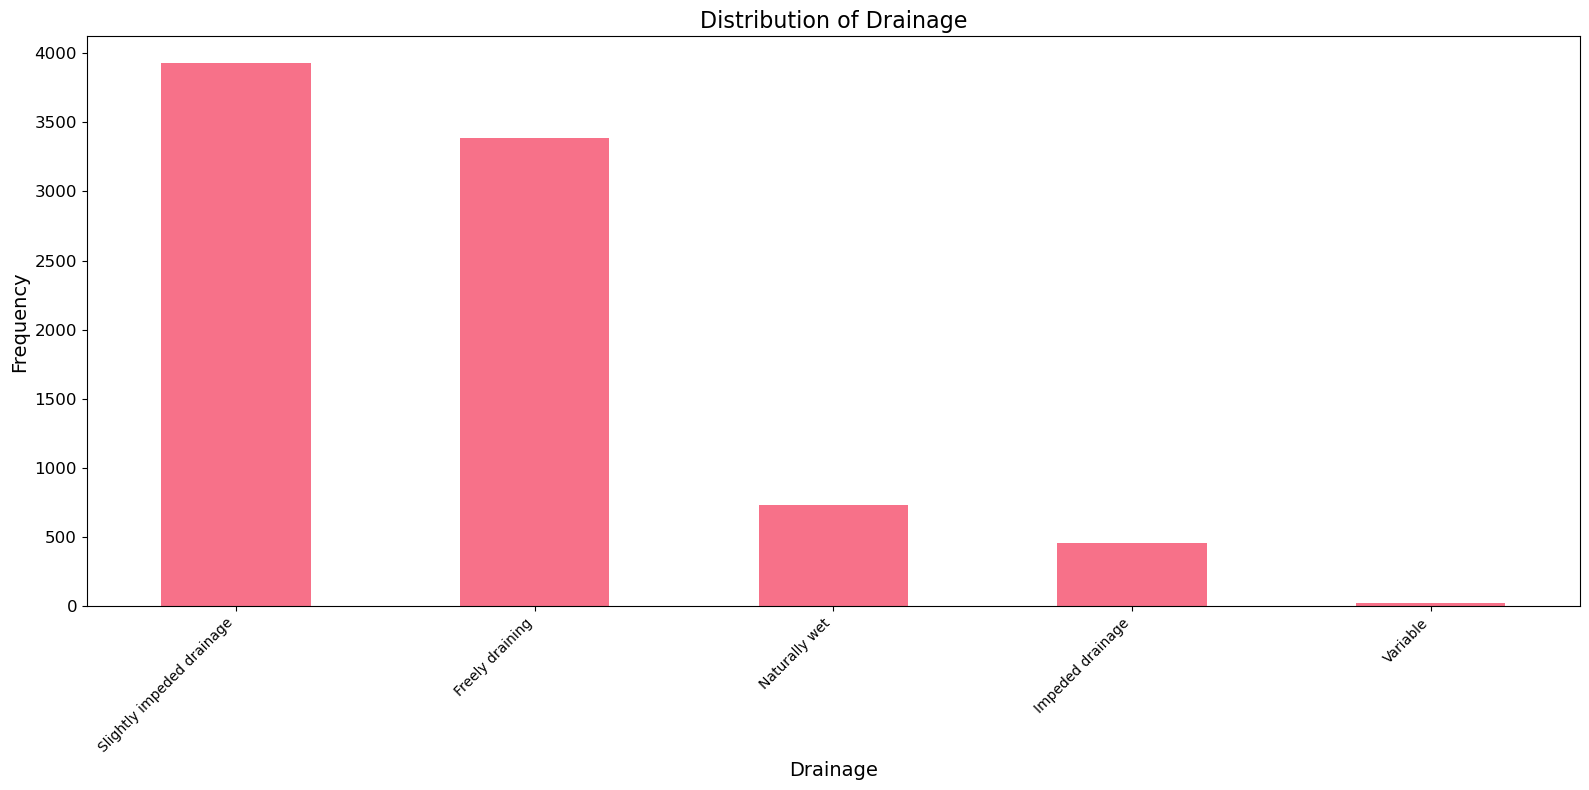


Percentage distribution (top 10):
Slightly impeded drainage: 42.91%
Freely draining: 37.03%
Naturally wet: 8.03%
Impeded drainage: 5.02%
Variable: 0.25%

=== FERTILITY ANALYSIS ===
Total unique values: 7
Top 10 most common values:
Fertility
High                3345
Lime-rich           1603
Low                 1474
Moderate            1106
Moderate to high     927
Low to high           53
Low to moderate       23
Name: count, dtype: int64


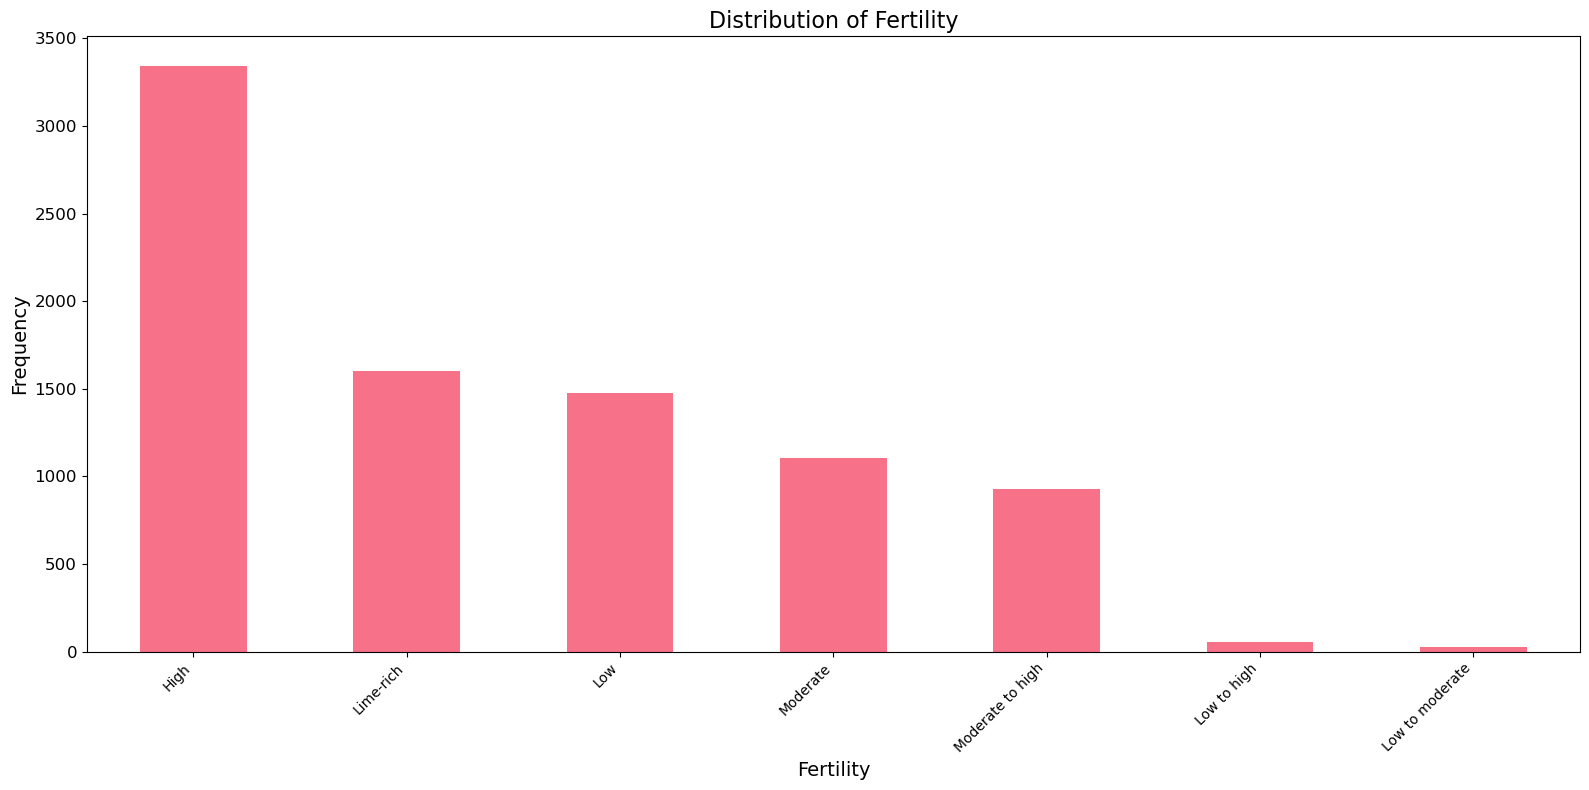


Percentage distribution (top 10):
High: 36.56%
Lime-rich: 17.52%
Low: 16.11%
Moderate: 12.09%
Moderate to high: 10.13%
Low to high: 0.58%
Low to moderate: 0.25%

=== HABITATS ANALYSIS ===
Total unique values: 12
Top 10 most common values:
Habitats
Base-rich pastures and classic chalky boulder clay ancient woodlands; some wetter areas and lime-rich flush vegetation        2999
Neutral and acid pastures and deciduous woodlands; acid communities such as bracken and gorse in the uplands                  1098
Herb-rich chalk and limestone pastures; lime-rich deciduous woodlands                                                          995
Wide range of pasture and woodland types                                                                                       927
Wet flood meadows with wet carr woodlands in old river meanders                                                                647
Herb-rich Downland and limestone pastures; limestone pavements in the uplands; Beech hangers and

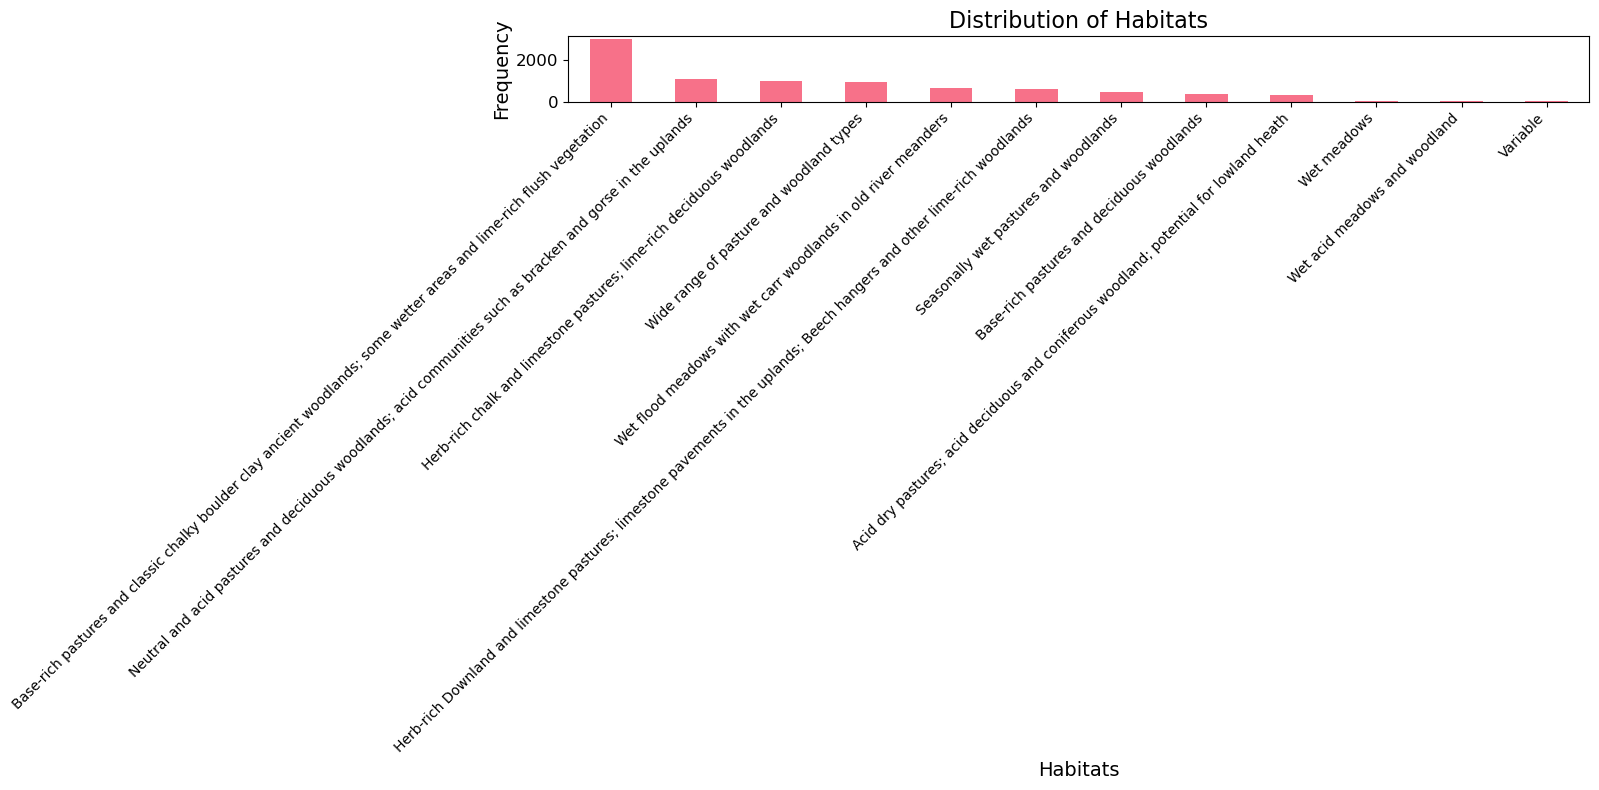


Percentage distribution (top 10):
Base-rich pastures and classic chalky boulder clay ancient woodlands; some wetter areas and lime-rich flush vegetation: 32.78%
Neutral and acid pastures and deciduous woodlands; acid communities such as bracken and gorse in the uplands: 12.0%
Herb-rich chalk and limestone pastures; lime-rich deciduous woodlands: 10.87%
Wide range of pasture and woodland types: 10.13%
Wet flood meadows with wet carr woodlands in old river meanders: 7.07%
Herb-rich Downland and limestone pastures; limestone pavements in the uplands; Beech hangers and other lime-rich woodlands: 6.64%
Seasonally wet pastures and woodlands: 5.02%
Base-rich pastures and deciduous woodlands: 3.78%
Acid dry pastures; acid deciduous and coniferous woodland; potential for lowland heath: 3.73%
Wet meadows: 0.58%

=== DRAINS_TO ANALYSIS ===
Total unique values: 6
Top 10 most common values:
Drains_to
Stream network                          4408
Chalk or limestone groundwater          1603
Local gr

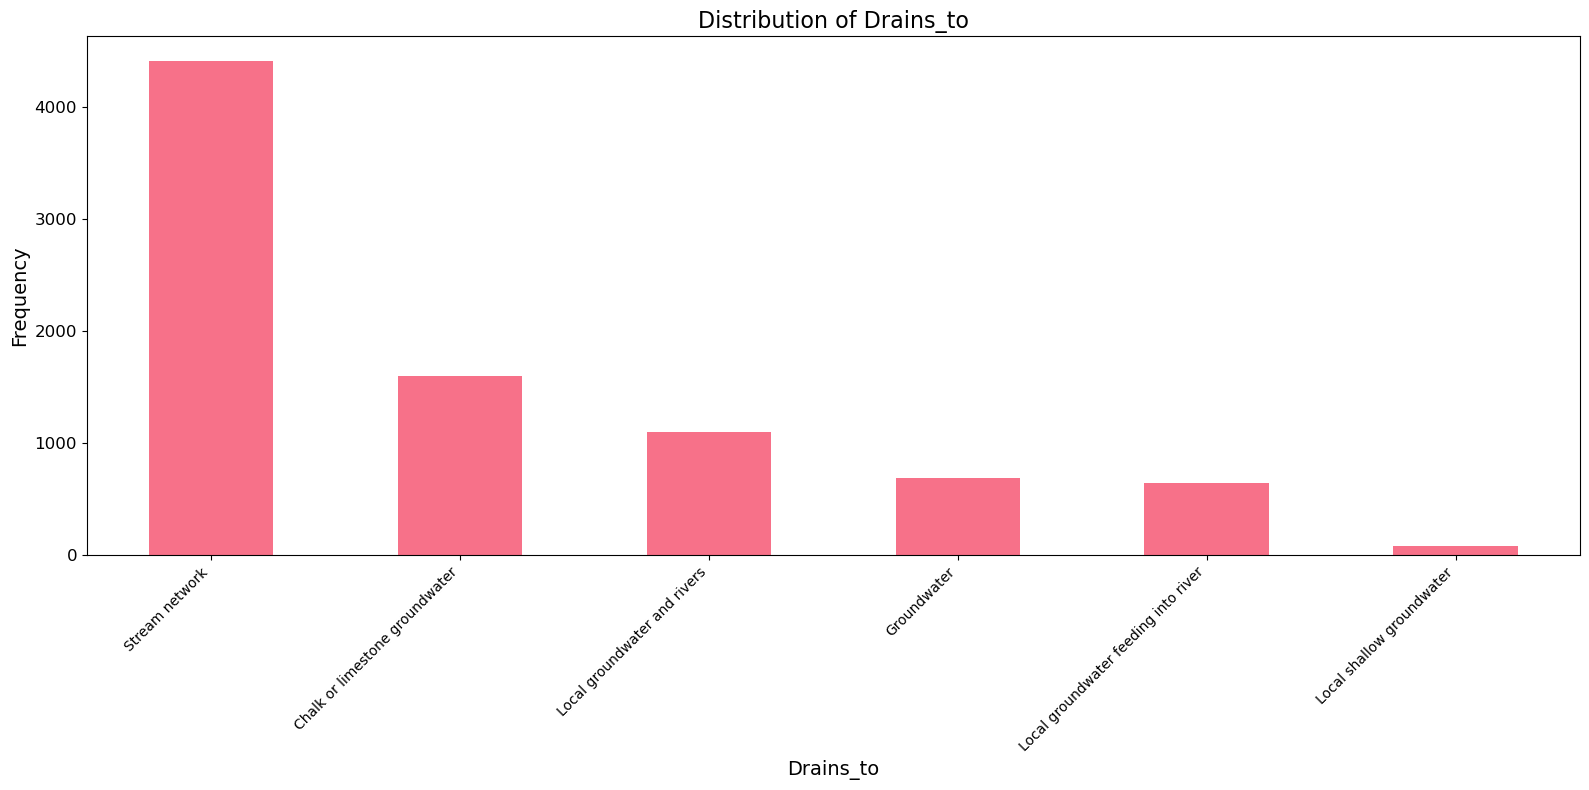


Percentage distribution (top 10):
Stream network: 48.17%
Chalk or limestone groundwater: 17.52%
Local groundwater and rivers: 12.0%
Groundwater: 7.51%
Local groundwater feeding into river: 7.07%
Local shallow groundwater: 0.96%

=== WATER_PROTECTION ANALYSIS ===
Total unique values: 10
Top 10 most common values:
Water_protection
Land is drained and nitrate vulnerable; potential for rapid pollutant transport; surface capping can trigger sheet erosion of fine sediment to stream network                                                                                         2999
Groundwater contamination with nitrate; siltation and nutrient enrichment of streams from soil erosion on certain of these soils                                                                                                                      1444
Vulnerable to leaching of nitrate to groundwater; surface capping and erosion of chalk soils under cereals is linked with nutrient enrichment and silting of chalk str

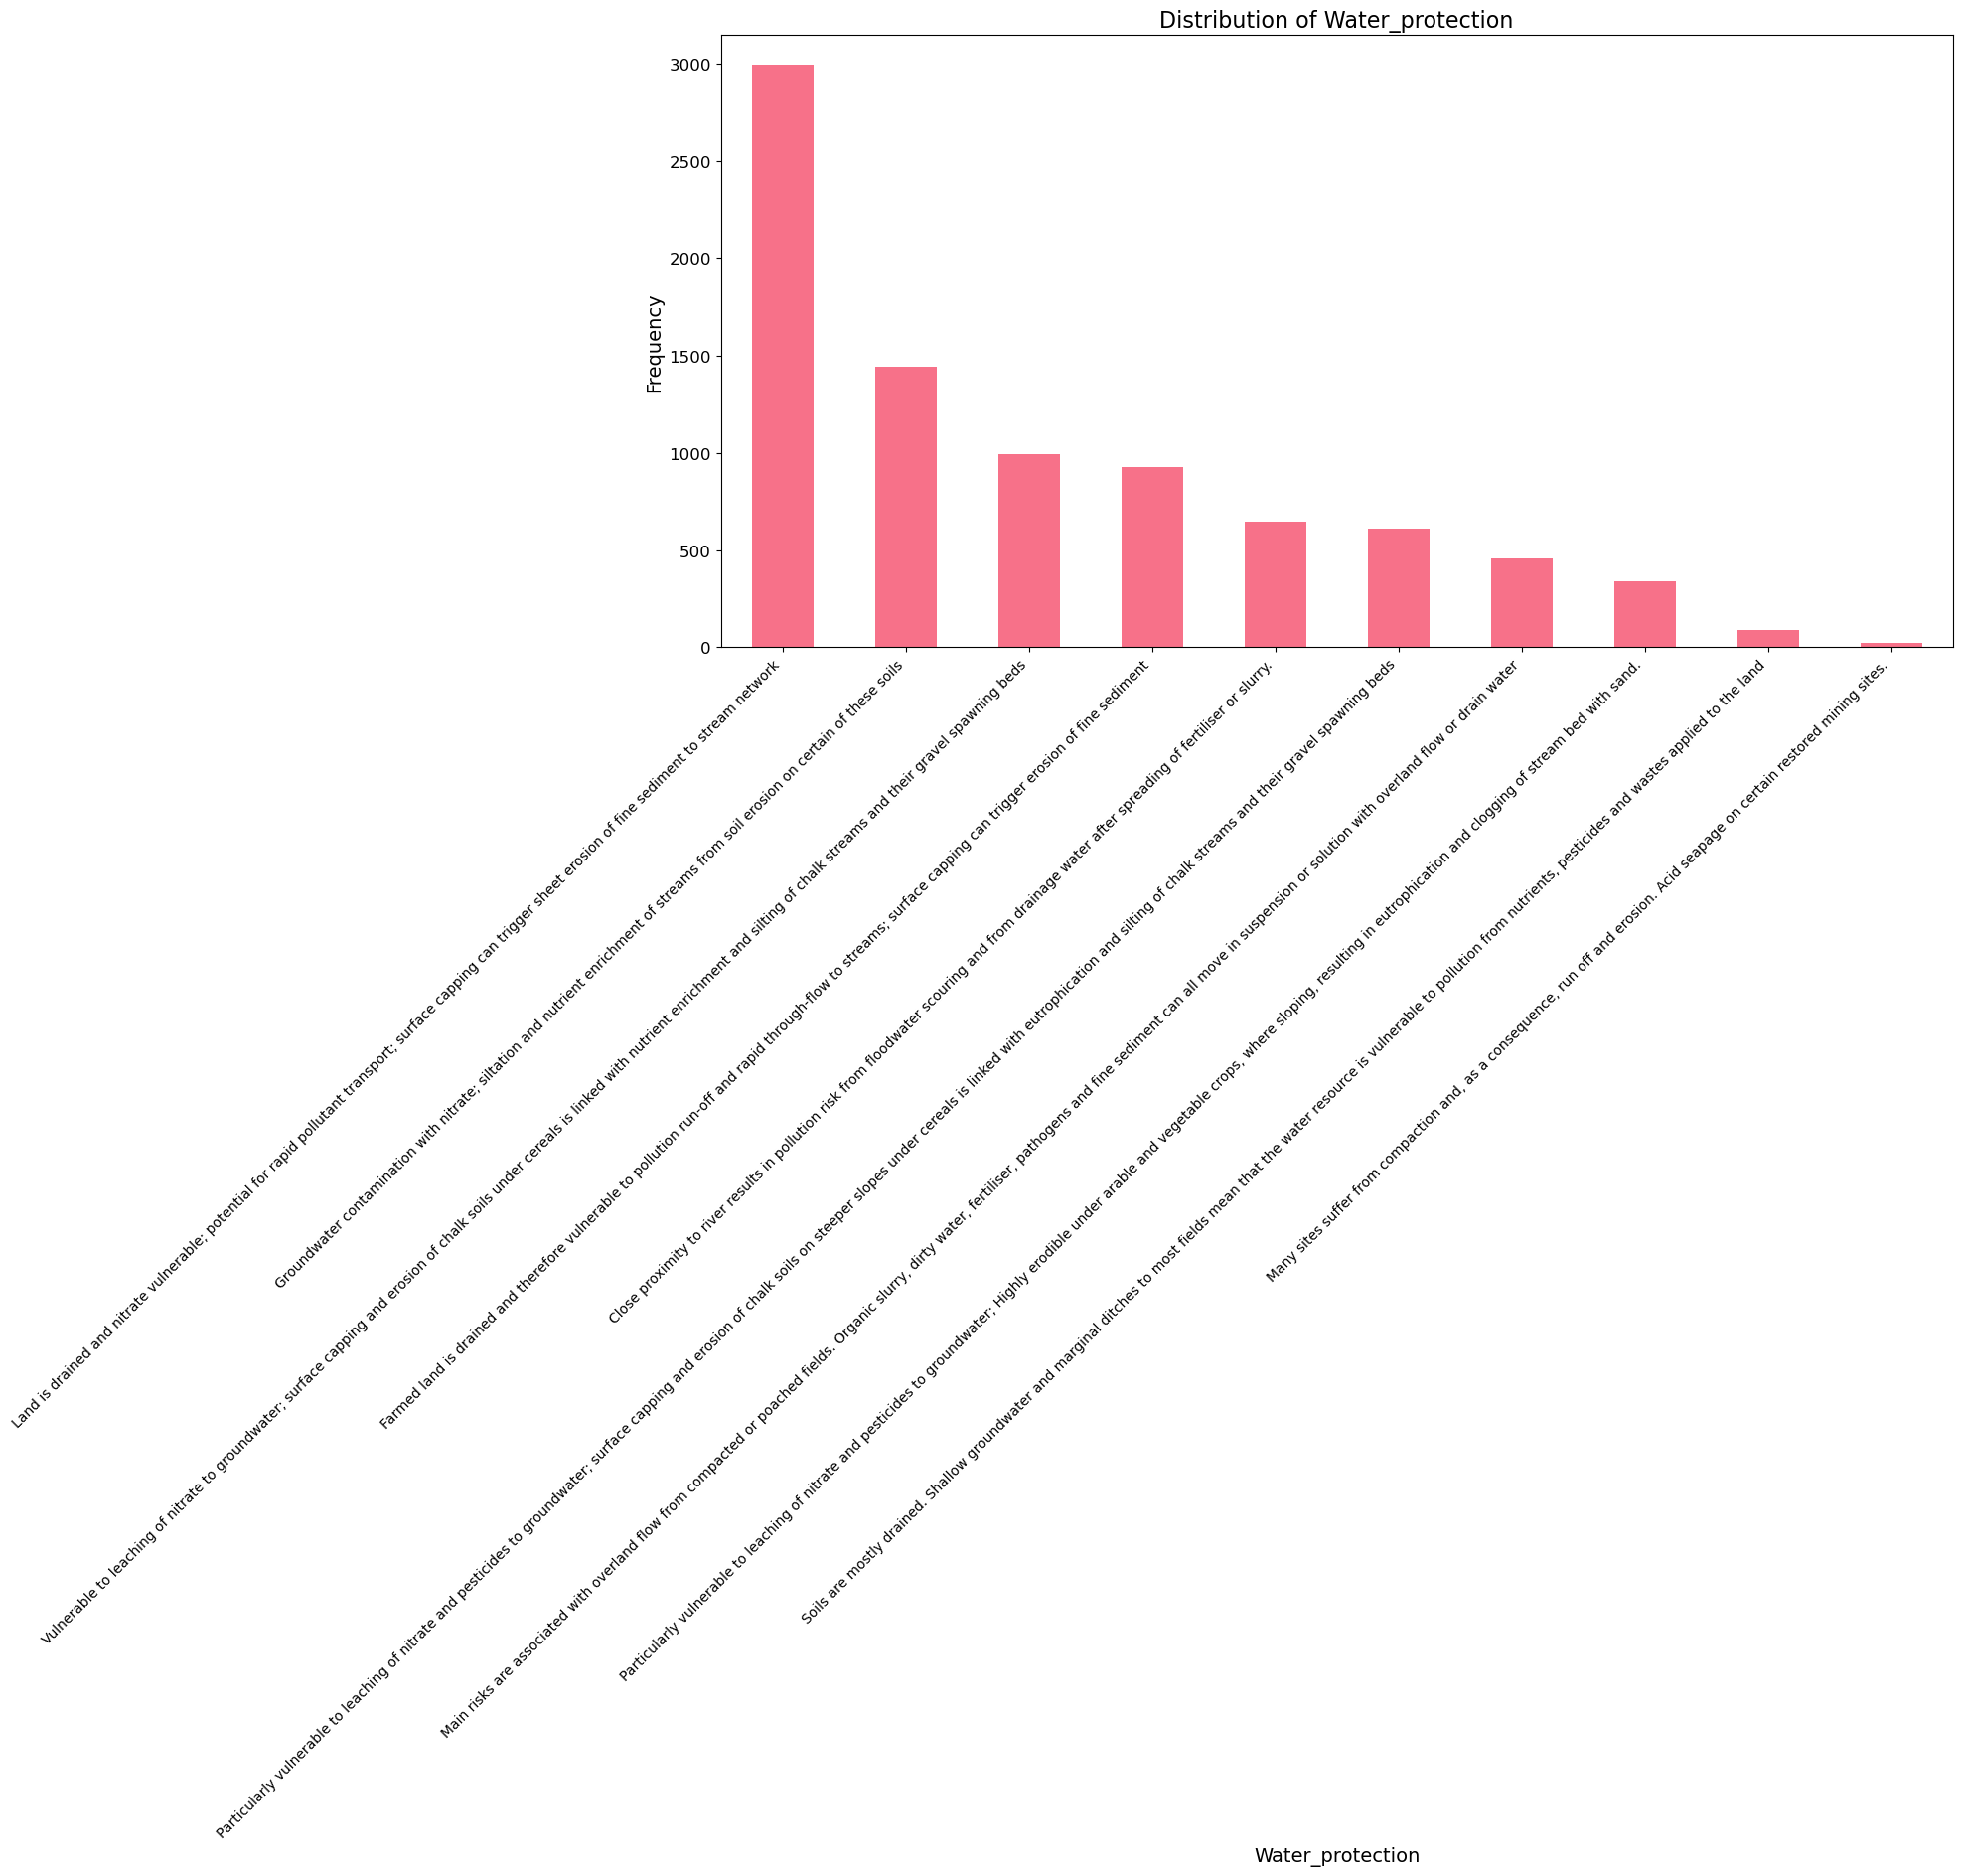


Percentage distribution (top 10):
Land is drained and nitrate vulnerable; potential for rapid pollutant transport; surface capping can trigger sheet erosion of fine sediment to stream network: 32.78%
Groundwater contamination with nitrate; siltation and nutrient enrichment of streams from soil erosion on certain of these soils: 15.78%
Vulnerable to leaching of nitrate to groundwater; surface capping and erosion of chalk soils under cereals is linked with nutrient enrichment and silting of chalk streams and their gravel spawning beds: 10.87%
Farmed land is drained and therefore vulnerable to pollution run-off and rapid through-flow to streams; surface capping can trigger erosion of fine sediment: 10.13%
Close proximity to river results in pollution risk from floodwater scouring and from drainage water after spreading of fertiliser or slurry.: 7.07%
Particularly vulnerable to leaching of nitrate and pesticides to groundwater; surface capping and erosion of chalk soils on steeper slopes 

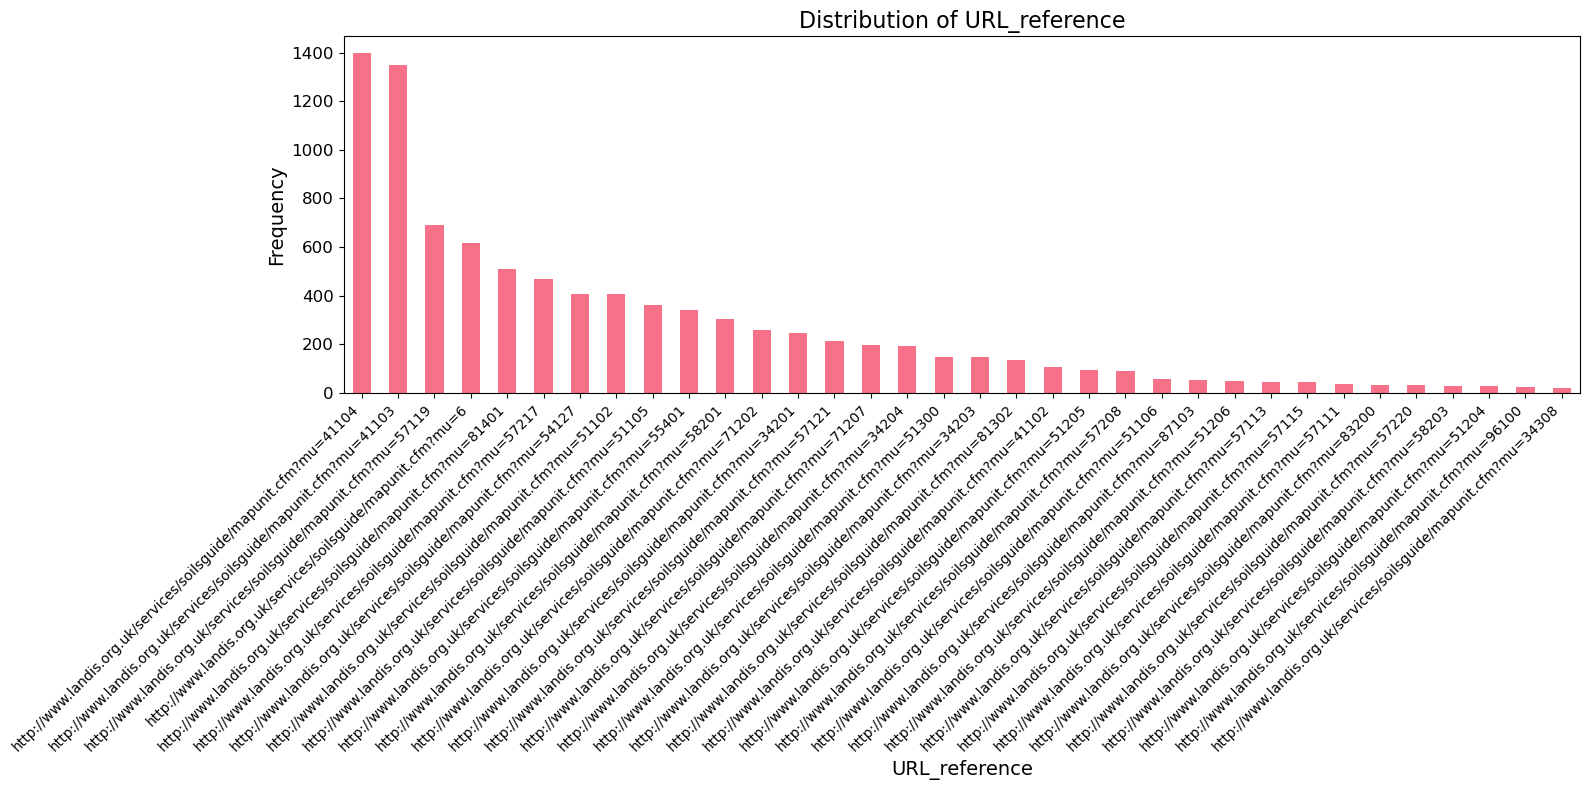


Percentage distribution (top 10):
http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=41104: 15.27%
http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=41103: 14.72%
http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=57119: 7.55%
http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=6: 6.77%
http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=81401: 5.6%
http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=57217: 5.13%
http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=54127: 4.45%
http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=51102: 4.45%
http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=51105: 3.95%
http://www.landis.org.uk/services/soilsguide/mapunit.cfm?mu=55401: 3.73%

Note: URL_reference has 34 unique values. Showing top 10 only.
Other 24 values represent 28.4% of data

=== CROSS-TABULATION ANALYSIS ===
Cross-tabulation between Map_symbol and Description:
Description  clayey over limestone  deep clay 

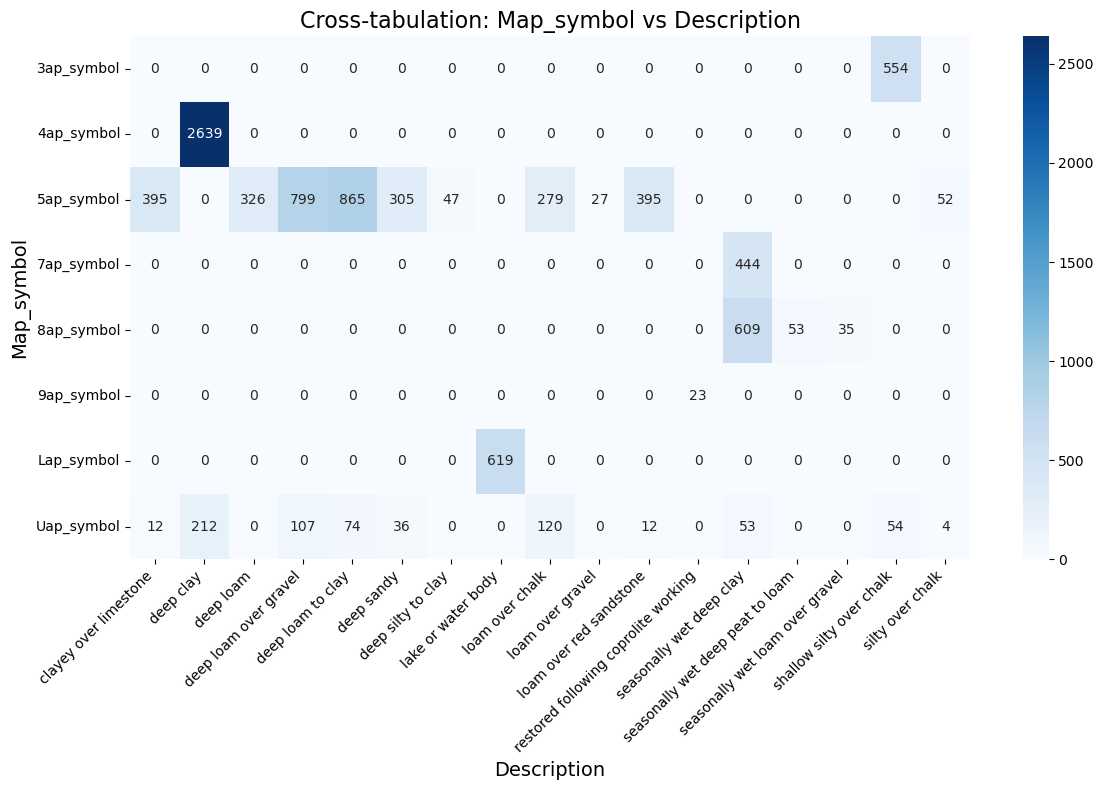

In [ ]:
# Analyse soils data - Focus on categorical/object data types
print("=== SOILS ANALYSIS ===")

# Analyse categorical soil properties (object data types)
if categorical_cols:
    print(f"\nAnalysing {len(categorical_cols)} categorical soil properties:")
    
    # Create visualisations for each categorical property
    for i, col in enumerate(categorical_cols):
        print(f"\n=== {col.upper()} ANALYSIS ===")
        
        # Get value counts
        value_counts = soils_df[col].value_counts()
        print(f"Total unique values: {len(value_counts)}")
        print(f"Top 10 most common values:")
        print(value_counts.head(10))
        
        # Create visualisation for this categorical property
        plt.figure(figsize=(16, 8))
        
        # Bar chart of value counts
        value_counts.plot(kind='bar')
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()
        
        # Show percentage distribution
        print(f"\nPercentage distribution (top 10):")
        percentages = (value_counts.head(10) / len(soils_df) * 100).round(2)
        for value, pct in percentages.items():
            print(f"{value}: {pct}%")
        
        # If there are too many categories, show summary
        if len(value_counts) > 20:
            print(f"\nNote: {col} has {len(value_counts)} unique values. Showing top 10 only.")
            print(f"Other {len(value_counts) - 10} values represent {((value_counts.iloc[10:].sum() / len(soils_df)) * 100):.1f}% of data")

# Cross-tabulation analysis between categorical soil properties
if len(categorical_cols) >= 2:
    print(f"\n=== CROSS-TABULATION ANALYSIS ===")
    
    # Create cross-tabulation between first two categorical columns
    col1, col2 = categorical_cols[0], categorical_cols[1]
    print(f"Cross-tabulation between {col1} and {col2}:")
    
    # Create crosstab
    crosstab = pd.crosstab(soils_df[col1], soils_df[col2], margins=True)
    print(crosstab)
    
    # Create heatmap of crosstab (excluding margins for cleaner visualisation)
    crosstab_clean = pd.crosstab(soils_df[col1], soils_df[col2])
    
    # Only show heatmap if not too large
    if crosstab_clean.shape[0] <= 20 and crosstab_clean.shape[1] <= 20:
        plt.figure(figsize=(12, 8))
        sns.heatmap(crosstab_clean, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Cross-tabulation: {col1} vs {col2}', fontsize=16)
        plt.xlabel(col2, fontsize=14)
        plt.ylabel(col1, fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Crosstab too large for heatmap ({crosstab_clean.shape[0]}x{crosstab_clean.shape[1]}). Showing data only.")

else:
    print("Need at least 2 categorical columns for cross-tabulation analysis.")


## Challenge 4 — Spatial Analysis and Grid Comparison

### Background
Both datasets are provided at 100m grid resolution for Bedfordshire. Understanding the spatial relationship between land cover and soil properties is crucial for environmental analysis, agricultural planning, and ecosystem management.

### Your Task
Perform spatial analysis and intercomparison of the datasets:
- Identify common grid coordinates between the datasets
- Create spatial visualisations showing the distribution of both datasets
- Analyse the relationship between land cover types and soil properties
- Identify areas of overlap and potential data gaps
- Create summary statistics for grid cell comparisons

**Success criteria:** successful spatial analysis, clear understanding of dataset relationships, informative spatial visualisations, meaningful intercomparison results.


=== SPATIAL ANALYSIS ===
Land cover coordinate columns: ['East_1K', 'North_1K']
Soils coordinate columns: ['East_1K', 'North_1K']

Coordinate information found in both datasets

Land cover coordinate ranges:
East_1K: 488000.00 to 527000.00
North_1K: 212000.00 to 271000.00

Soils coordinate ranges:
East_1K: 488000.00 to 527000.00
North_1K: 212000.00 to 271000.00


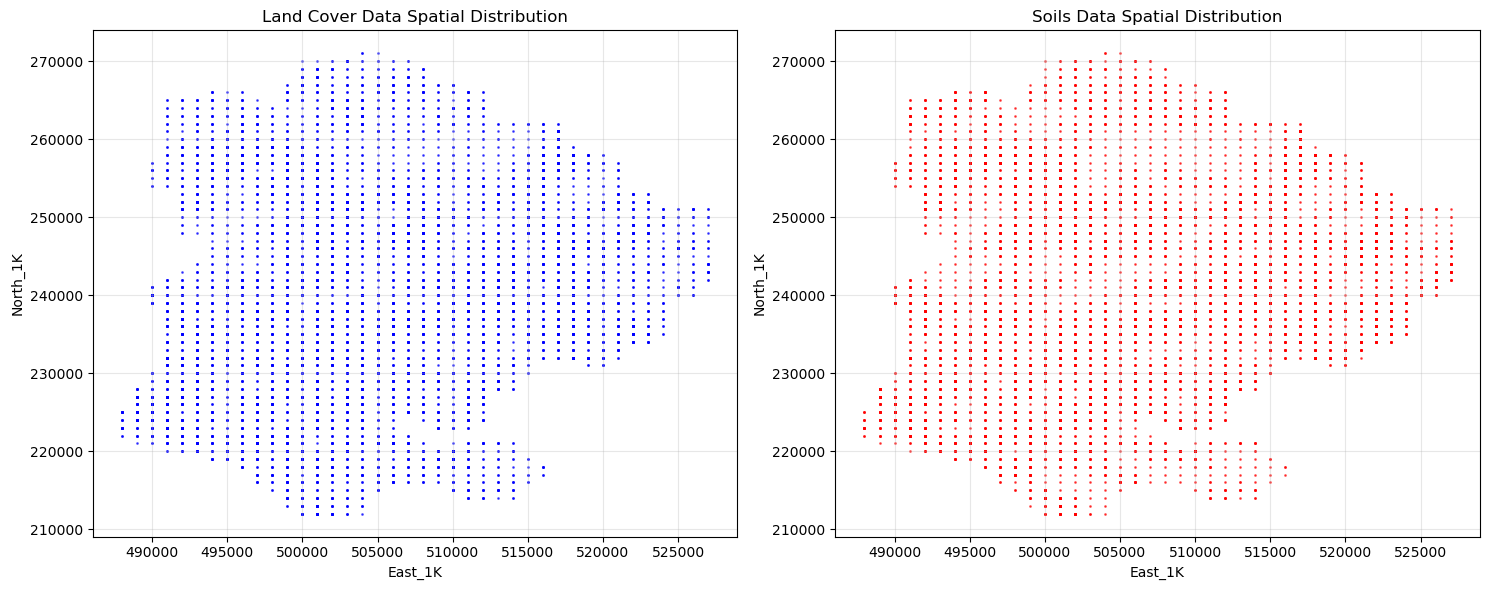

In [ ]:
# Spatial analysis and grid comparison
print("=== SPATIAL ANALYSIS ===")

# Identify coordinate columns (assuming they contain 'x', 'y', 'lon', 'lat', 'east', 'north')
coord_keywords = ['East_1K', 'North_1K']
landcover_coords = [col for col in landcover_df.columns if any(keyword in col for keyword in coord_keywords)]
soils_coords = [col for col in soils_df.columns if any(keyword in col for keyword in coord_keywords)]

print(f"Land cover coordinate columns: {landcover_coords}")
print(f"Soils coordinate columns: {soils_coords}")

# Check if we have coordinate information
if landcover_coords and soils_coords:
    print("\nCoordinate information found in both datasets")
    
    # Display coordinate ranges
    print("\nLand cover coordinate ranges:")
    for col in landcover_coords:
        print(f"{col}: {landcover_df[col].min():.2f} to {landcover_df[col].max():.2f}")
    
    print("\nSoils coordinate ranges:")
    for col in soils_coords:
        print(f"{col}: {soils_df[col].min():.2f} to {soils_df[col].max():.2f}")
    
    # Create spatial scatter plots if we have 2D coordinates
    if len(landcover_coords) >= 2 and len(soils_coords) >= 2:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Land cover spatial plot
        axes[0].scatter(landcover_df[landcover_coords[0]], landcover_df[landcover_coords[1]], 
                       alpha=0.6, s=1, c='blue')
        axes[0].set_xlabel(landcover_coords[0])
        axes[0].set_ylabel(landcover_coords[1])
        axes[0].set_title('Land Cover Data Spatial Distribution')
        axes[0].grid(True, alpha=0.3)
        
        # Soils spatial plot
        axes[1].scatter(soils_df[soils_coords[0]], soils_df[soils_coords[1]], 
                       alpha=0.6, s=1, c='red')
        axes[1].set_xlabel(soils_coords[0])
        axes[1].set_ylabel(soils_coords[1])
        axes[1].set_title('Soils Data Spatial Distribution')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
else:
    print("Coordinate information not clearly identified. Please examine the data structure above.")


## Challenge 5 — Advanced Intercomparison Analysis

### Background
Understanding the relationships between land cover and soil properties is crucial for environmental management, agricultural planning, and ecosystem services assessment. Advanced analysis can reveal patterns that inform land use decisions and environmental policy.

### Your Task
Perform advanced intercomparison analysis between land cover and soils data:
- Create cross-tabulation analysis between land cover types and soil properties
- Identify correlations between land cover and soil characteristics
- Perform statistical tests to identify significant relationships
- Create comprehensive visualisations showing land cover-soil relationships
- Generate summary reports of key findings

**Success criteria:** thorough intercomparison analysis, identification of meaningful relationships, clear statistical interpretation, comprehensive visualisations, actionable insights.


=== ADVANCED INTERCOMPARISON ANALYSIS ===
Creating merged dataset using East_1K and North_1K coordinates...

First few rows of merged dataset:
Merged dataset shape: (75869, 25)
Successfully merged 75869 grid cells

=== CATEGORICAL INTERCOMPARISON ANALYSIS ===
Land cover description column: Description_lc
Soil categorical columns: ['Description_soil']

=== DESCRIPTION_SOIL vs LAND COVER DESCRIPTION ===
Cross-tabulation between Description_soil and Description_lc:
Description_lc                        Airports  Broad-leaved forest  \
Description_soil                                                      
clayey over limestone                        0                  111   
deep clay                                   10                  718   
deep loam                                    0                  100   
deep loam over gravel                        0                  143   
deep loam to clay                           38                  195   
deep sandy                          

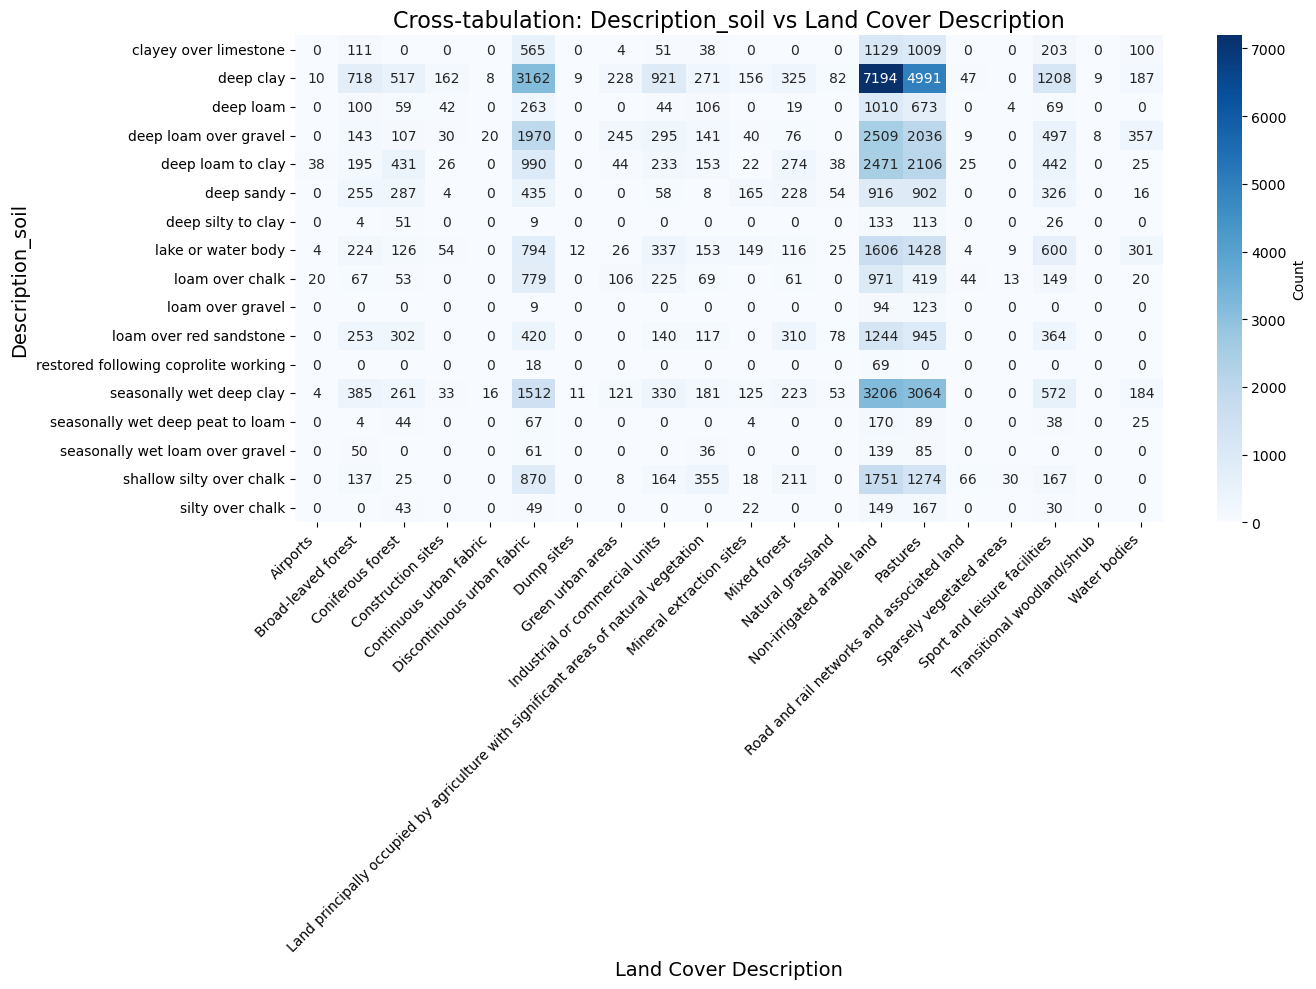


Chi-square test for independence:
Chi-square statistic: 11064.5823
p-value: 0.000000
Degrees of freedom: 304
Result: Significant association between variables (p < 0.05)

Top 10 most common combinations:
Description_soil          Description_lc            
deep clay                 Non-irrigated arable land     7194
                          Pastures                      4991
seasonally wet deep clay  Non-irrigated arable land     3206
deep clay                 Discontinuous urban fabric    3162
seasonally wet deep clay  Pastures                      3064
deep loam over gravel     Non-irrigated arable land     2509
deep loam to clay         Non-irrigated arable land     2471
                          Pastures                      2106
deep loam over gravel     Pastures                      2036
                          Discontinuous urban fabric    1970
dtype: int64

=== MERGED DATA SUMMARY ===
Total merged grid cells: 75,869
Coverage area: 758.69 km²

Data completeness in merged dat

In [ ]:
# Advanced intercomparison analysis - Focus on categorical relationships
print("=== ADVANCED INTERCOMPARISON ANALYSIS ===")

# Use specific coordinate fields for merging
coord_cols = ['East_1K', 'North_1K']

# Check if both datasets have the required coordinate columns
if all(col in landcover_df.columns for col in coord_cols) and all(col in soils_df.columns for col in coord_cols):
    print("Creating merged dataset using East_1K and North_1K coordinates...")
    
    # Create coordinate-based merge
    landcover_df['coord_key'] = list(zip(landcover_df['East_1K'], landcover_df['North_1K']))
    soils_df['coord_key'] = list(zip(soils_df['East_1K'], soils_df['North_1K']))

    #print(landcover_df.head())
    #print(soils_df.head())
    
    # Merge datasets on coordinates
    merged_df = pd.merge(landcover_df, soils_df, on='coord_key', how='inner', suffixes=('_lc', '_soil'))
    #print(merged_df.head())
    
    # Display the first few rows of the merged dataset
    print("\nFirst few rows of merged dataset:")
    merged_df.head()
    
    print(f"Merged dataset shape: {merged_df.shape}")
    print(f"Successfully merged {len(merged_df)} grid cells")
    
    if len(merged_df) > 0:
        # Focus on categorical analysis between land cover Description and soil object fields
        print("\n=== CATEGORICAL INTERCOMPARISON ANALYSIS ===")
        
        # Identify the Description column in land cover data
        lc_desc_col = 'Description_lc' if 'Description_lc' in merged_df.columns else None
        
        # Identify categorical columns from soils data (excluding coordinate columns)
        soil_categorical_cols = [col for col in merged_df.columns 
                               if col.endswith('_soil') and 
                               pd.api.types.is_object_dtype(merged_df[col]) and
                               not any(coord in col for coord in ['East', 'North', 'coord'])]
        
        print(f"Land cover description column: {lc_desc_col}")
        print(f"Soil categorical columns: {soil_categorical_cols}")
        
        if lc_desc_col and soil_categorical_cols:
            # Create cross-tabulation analysis for each soil categorical field vs land cover description
            for soil_col in soil_categorical_cols:
                print(f"\n=== {soil_col.upper()} vs LAND COVER DESCRIPTION ===")
                
                # Create cross-tabulation
                crosstab = pd.crosstab(merged_df[soil_col], merged_df[lc_desc_col], margins=True)
                print(f"Cross-tabulation between {soil_col} and {lc_desc_col}:")
                print(crosstab)
                
                # Create visualisation if not too large
                crosstab_clean = pd.crosstab(merged_df[soil_col], merged_df[lc_desc_col])
                
                if crosstab_clean.shape[0] <= 20 and crosstab_clean.shape[1] <= 20:
                    plt.figure(figsize=(14, 10))
                    sns.heatmap(crosstab_clean, annot=True, fmt='d', cmap='Blues', 
                               cbar_kws={'label': 'Count'})
                    plt.title(f'Cross-tabulation: {soil_col} vs Land Cover Description', fontsize=16)
                    plt.xlabel('Land Cover Description', fontsize=14)
                    plt.ylabel(soil_col, fontsize=14)
                    plt.xticks(rotation=45, ha='right')
                    plt.yticks(rotation=0)
                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"Crosstab too large for heatmap ({crosstab_clean.shape[0]}x{crosstab_clean.shape[1]}).")
                
                # Calculate chi-square test for independence
                from scipy.stats import chi2_contingency
                chi2, p_value, dof, expected = chi2_contingency(crosstab_clean)
                print(f"\nChi-square test for independence:")
                print(f"Chi-square statistic: {chi2:.4f}")
                print(f"p-value: {p_value:.6f}")
                print(f"Degrees of freedom: {dof}")
                if p_value < 0.05:
                    print("Result: Significant association between variables (p < 0.05)")
                else:
                    print("Result: No significant association between variables (p >= 0.05)")
                
                # Show most common combinations
                print(f"\nTop 10 most common combinations:")
                combinations = merged_df.groupby([soil_col, lc_desc_col]).size().sort_values(ascending=False)
                print(combinations.head(10))
        
        # Summary statistics
        print(f"\n=== MERGED DATA SUMMARY ===")
        print(f"Total merged grid cells: {len(merged_df):,}")
        print(f"Coverage area: {len(merged_df) * 100 * 100 / 1_000_000:.2f} km²")
        
        # Data completeness
        print("\nData completeness in merged dataset:")
        completeness = (1 - merged_df.isnull().sum() / len(merged_df)) * 100
        for col, comp in completeness.items():
            if comp < 100:
                print(f"{col}: {comp:.1f}% complete")
    
    else:
        print("No overlapping data found between datasets.")
        
else:
    print("Cannot perform intercomparison analysis - missing East_1K or North_1K coordinate columns.")
    print(f"Land cover columns: {list(landcover_df.columns)}")
    print(f"Soils columns: {list(soils_df.columns)}")


## Epilogue
In this notebook, a comprehensive framework for analysing soils and land cover data has been provided. You have explored data loading, statistical analysis, spatial visualisation, and intercomparison techniques that can be applied to environmental datasets.

**Extension ideas:**
• Integrate with climate data from the other notebooks for comprehensive environmental analysis
• Develop machine learning models to predict soil properties from land cover data
• Create interactive dashboards for stakeholder engagement
• Perform spatial clustering analysis to identify distinct environmental zones
• Develop land suitability models for agricultural or conservation planning
• Integrate with remote sensing data for temporal analysis
• Create ecosystem services assessment frameworks
• Develop flood risk models combining soils, land cover, and climate data

This analysis framework provides a solid foundation for environmental data science applications and can be adapted for various research and planning purposes.
